<div style="background: linear-gradient(135deg,#1e2a3a,#2f3e4e); padding:26px; border-radius:12px; font-family:'Segoe UI', Roboto, Arial; color:#d1d5db; line-height:1.6; border:1px solid #4b5563; box-shadow:0 8px 16px rgba(0,0,0,0.2); max-width:980px;">

  <h1 style="margin:0 0 8px 0; font-size:28px; color:#fff; font-weight:600; text-shadow:1px 1px 3px rgba(0,0,0,0.3);">
    DA5401 A6: Missing Data Imputation and Model Performance
  </h1>

  <p style="margin:6px 0 16px 0; color:#9ca3af;">
    <strong>Student Name:</strong> Ashish Rajhans Meshram &nbsp; &nbsp; | &nbsp; &nbsp;
    <strong>Roll No:</strong> DA25M016
  </p>

  <p style="margin:0 0 18px 0;">
    This notebook explores how different <strong>missing-data imputation strategies</strong> affect model performance for a
    <strong>credit risk assessment</strong> task using the UCI Credit Card Default Clients Dataset (with artificially introduced MAR).
    We'll implement three imputation strategies (median, linear regression, non-linear regression), train logistic regression models,
    and compare results.
  </p>

  <hr style="border:none; border-top:1px solid #4b5563; margin:18px 0;">

  <h2 style="font-size:16px; color:#e5e7eb; margin:0 0 8px 0; padding-bottom:6px; border-bottom:2px solid #5a6b7e;">
    📌 Problem Statement
  </h2>

  <p style="margin:10px 0 14px 0; color:#d1d5db;">
    You are a machine learning engineer working on credit risk. The dataset contains missing values in key numeric columns preventing direct use of classifiers.
    Your task: implement three imputation strategies and evaluate how each impacts classification metrics.
  </p>

  <p style="margin:0 0 18px 0; color:#9ca3af;">
    <strong>Dataset:</strong> UCI Credit Card Default Clients Dataset (Kaggle). Before Part A, introduce MAR missing values (5–10%) into numeric columns such as <em>AGE</em> and <em>BILL_AMT</em>.
  </p>

  <hr style="border:none; border-top:1px solid #4b5563; margin:18px 0;">

  <h2 style="font-size:16px; color:#e5e7eb; margin:0 0 8px 0; padding-bottom:6px; border-bottom:2px solid #5a6b7e;">
    🧩 Notebook Outline
  </h2>

  <ol style="color:#d1d5db; padding-left:20px; margin-top:12px;">
    <li style="margin-bottom:14px; font-weight:600;">
      Part A: Data Preprocessing and Imputation [20 points]
      <ul style="color:#9ca3af; margin-top:8px; padding-left:18px;">
        <li style="margin-bottom:8px;">Load &amp; prepare dataset; introduce MAR missing values (5–10%).</li>
        <li style="margin-bottom:8px;"><strong>Imputation Strategy 1:</strong> Median Imputation (Dataset A) — justify median vs mean.</li>
        <li style="margin-bottom:8px;"><strong>Imputation Strategy 2:</strong> Linear Regression Imputation (Dataset B) — explain MAR assumption.</li>
        <li style="margin-bottom:8px;"><strong>Imputation Strategy 3:</strong> Non-linear Regression Imputation (Dataset C) — use KNN or Decision Tree Regression.</li>
      </ul>
    </li>

<li style="margin-bottom:14px; font-weight:600;">
      Part B: Model Training and Performance Assessment [10 points]
      <ul style="color:#9ca3af; margin-top:8px; padding-left:18px;">
        <li style="margin-bottom:8px;">Create Dataset D by listwise deletion. Split datasets A–D into train/test sets.</li>
        <li style="margin-bottom:8px;">Standardize features using <strong>StandardScaler</strong>.</li>
        <li style="margin-bottom:8px;">Train a <strong>Logistic Regression</strong> model on each dataset.</li>
        <li style="margin-bottom:8px;">Evaluate using <strong>Classification Report</strong>: Accuracy, Precision, Recall, F1-score.</li>
      </ul>
    </li>

<li style="margin-bottom:6px; font-weight:600;">
      Part C: Comparative Analysis [20 points]
      <ul style="color:#9ca3af; margin-top:8px; padding-left:18px;">
        <li style="margin-bottom:8px;">Create a summary table comparing Models A (Median), B (Linear), C (Non-linear), D (Listwise) — focus on F1-score.</li>
        <li style="margin-bottom:8px;">Discuss trade-offs between Listwise Deletion and Imputation.</li>
        <li style="margin-bottom:8px;">Analyze which regression (Linear vs Non-linear) worked better and why.</li>
        <li style="margin-bottom:8px;">Conclude with a recommended imputation strategy referencing both metrics and conceptual reasoning.</li>
      </ul>
    </li>
  </ol>

</div>


In [7]:
import warnings
warnings.filterwarnings('ignore')

<div style="
    background-color: #2b3a4a;
    padding: 20px 25px;
    margin: 30px 0 20px 0;
    border-radius: 10px;
    border-left: 6px solid #5a9bd5;
    box-shadow: 0 4px 10px rgba(0,0,0,0.25);
    font-family: 'Segoe UI', 'Roboto', sans-serif;
">
    <h2 style="
        font-size: 1.7em;
        font-weight: 600;
        color: #ffffff;
        margin: 0;
        text-shadow: 1px 1px 3px rgba(0,0,0,0.3);
    ">
         Part A: Data Preprocessing and Imputation
    </h2>
    <p style="
        color: #b0bec5;
        margin: 8px 0 12px 0;
        font-size: 1em;
        font-weight: 300;
    ">
        Load and prepare the dataset, introduce MAR missing values (5–10%), and apply three imputation strategies to handle them.
    </p>

<ul style="color:#d1d5db; margin:0; padding-left:22px; line-height:1.6;">
        <li>Load and clean the dataset before introducing artificial MAR missingness.</li>
        <li><b>Imputation Strategy 1:</b> Median Imputation (Dataset A) — justify median over mean to handle skewed distributions.</li>
        <li><b>Imputation Strategy 2:</b> Linear Regression Imputation (Dataset B) — explain the MAR assumption and its validity.</li>
        <li><b>Imputation Strategy 3:</b> Non-linear Regression Imputation (Dataset C) — apply KNN or Decision Tree Regression for capturing complex patterns.</li>
    </ul>
</div>


<div style="
    background-color: #f0f4f8;
    padding: 18px 22px;
    margin: 18px 0;
    border-radius: 8px;
    border-left: 5px solid #42a5f5;
    box-shadow: 0 4px 12px rgba(0,0,0,0.08);
    font-family: 'Segoe UI', 'Roboto', sans-serif;
">
    <h3 style="
        font-size: 1.3em;
        font-weight: 600;
        color: #263238;
        margin: 0 0 8px 0;
    ">
        1. Load and Prepare Data
    </h3>
    <p style="
        color: #546e7a;
        margin: 0 0 10px 0;
        font-size: 0.95em;
        font-weight: 400;
        line-height: 1.6;
    ">
        This section handles the initial preparation of the <b>UCI Credit Card Default Clients Dataset</b>. 
        Tasks include loading the dataset, cleaning column names, identifying the target variable, and artificially introducing <b>Missing At Random (MAR)</b> values to simulate a real-world data challenge.
    </p>
    <ul style="
        color: #546e7a;
        font-size: 0.9em;
        font-weight: 400;
        padding-left: 22px;
        margin: 0;
        list-style-type: square;
    ">
        <li style="padding-bottom: 5px;">
            Load the dataset and inspect columns for consistency and naming conventions.
        </li>
        <li style="padding-bottom: 5px;">
            Identify the target variable: <b>default payment next month</b> (1 = Default, 0 = No Default).
        </li>
        <li>
            Introduce <b>MAR missing values</b> in key features (e.g., <code style="color: #1e88e5; background-color: #e3f2fd; padding: 2px 6px; border-radius: 4px;">AGE</code>, <code style="color: #1e88e5; background-color: #e3f2fd; padding: 2px 6px; border-radius: 4px;">BILL_AMT1-6</code>) to mimic real-world incomplete data.
        </li>
    </ul>
</div>


In [1]:

#Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

# Set global visualization settings
plt.style.use('seaborn-v0_8-whitegrid')

# Color palette that is color-blind friendly
# (These colors are distinguishable by most color-blind people)
color_blind_palette = ["#0072B2", "#D55E00", "#009E73", "#F0E442", "#56B4E9", "#E69F00"]

sns.set_palette(color_blind_palette)
np.random.seed(42)


data = pd.read_csv("UCI_Credit_Card.csv")

# Preview
print("✅ Data Loaded Successfully!")
print(f"Shape: {data.shape}")
data.head()


✅ Data Loaded Successfully!
Shape: (30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<div style="
background-color: #eef2f6;
padding: 18px 22px;
margin: 18px 0;
border-radius: 8px;
border-left: 5px solid #f57c00;
box-shadow: 0 4px 12px rgba(0,0,0,0.08);
font-family: 'Segoe UI', 'Roboto', sans-serif;
">

<h2 style="font-size: 1.5em; font-weight: 700; color: #263238; margin-bottom: 10px;">
Credit Risk Assessment: The Missing Data Challenge
</h2>

<hr style="border: none; border-top: 1px solid #cfd8dc; margin: 10px 0;">

<h3 style="font-size: 1.2em; font-weight: 600; color: #263238; margin-top: 15px;">
The Problem
</h3>
<p style="color: #546e7a; font-size: 0.95em; line-height: 1.6;">
In the world of credit risk assessment, decisions can make or break financial institutions.
Imagine you're working with a bank that has collected detailed client data — age, income, repayment history, and bill amounts. But like in most real-world cases, the data is incomplete.
</p>

<ul style="color: #546e7a; font-size: 0.9em; padding-left: 20px; margin: 0;">
<li>Some clients didn't disclose their age.</li>
<li>Others have missing billing information.</li>
<li>Payment histories contain gaps.</li>
</ul>

<h3 style="font-size: 1.2em; font-weight: 600; color: #263238; margin-top: 20px;">
The Mission
</h3>
<p style="color: #546e7a; font-size: 0.95em; line-height: 1.6;">
Before building a model to predict whether a client will default next month, we must first solve the missing data puzzle.
In this project, we'll explore different imputation strategies to see how each one affects our classification model's ability to predict risk accurately.
</p>

<h3 style="font-size: 1.2em; font-weight: 600; color: #263238; margin-top: 20px;">
Our Approach
</h3>
<p style="color: #546e7a; font-size: 0.95em; line-height: 1.6;">
We'll investigate three key imputation strategies:
</p>

<ol style="color: #546e7a; font-size: 0.9em; padding-left: 22px; margin: 0;">
<li><b>Simple Imputation:</b> Using basic statistical measures like mean, median, and mode to fill gaps.</li>
<li><b>Linear Regression Imputation:</b> Leveraging linear relationships between variables to predict missing values.</li>
<li><b>Non-Linear Regression Imputation:</b> Applying advanced machine learning techniques to capture complex patterns.</li>
</ol>

<h3 style="font-size: 1.2em; font-weight: 600; color: #263238; margin-top: 20px;">
Why This Matters
</h3>
<blockquote style="color: #455a64; font-size: 0.95em; line-height: 1.6; border-left: 4px solid #f57c00; padding-left: 10px; margin: 10px 0;">
The way we handle missing data directly impacts:<br>
- Model accuracy and reliability<br>
- Business decisions worth millions<br>
- Client outcomes and financial stability
</blockquote>

<p style="color: #546e7a; font-size: 0.95em; line-height: 1.6;">
Each imputation method tells a different story about our data — and choosing the right one could mean the difference between identifying risk accurately or making costly mistakes.
</p>


</div>


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

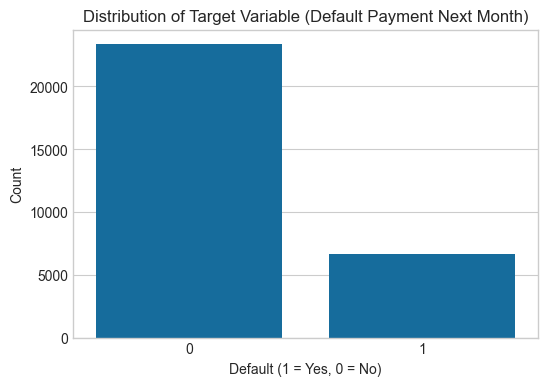

In [2]:
# Basic info
data.info()

# Check target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x='default.payment.next.month', data=data)
plt.title("Distribution of Target Variable (Default Payment Next Month)")
plt.xlabel("Default (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


<div style="
background-color: #eef2f6;
padding: 18px 22px;
margin: 18px 0;
border-radius: 8px;
border-left: 5px solid #1976d2;
box-shadow: 0 4px 12px rgba(0,0,0,0.08);
font-family: 'Segoe UI', 'Roboto', sans-serif;
">

<h4 style="
font-size: 1.15em;
font-weight: 600;
color: #263238;
margin: 0 0 8px 0;
">
Artificially Introduce MAR (Missing At Random) Values
</h4>

<p style="
color: #546e7a;
margin: 0;
font-size: 0.95em;
font-weight: 400;
line-height: 1.6;
">
We’ll introduce missingness in the <b>AGE</b> and <b>BILL_AMT1</b> to <b>BILL_AMT6</b> columns — approximately <b>5% of randomly selected rows per column</b>. This simulates a realistic Missing At Random (MAR) pattern, allowing us to test how different imputation strategies handle partially missing information in key financial attributes.
</p>

</div>


In [3]:
# Copy the dataset before modifying
df = data.copy()

# Columns where we'll introduce MAR missing values
mar_cols = ['AGE', 'BILL_AMT1', 'BILL_AMT2']

for col in mar_cols:
    # Randomly select 5% indices
    n_missing = int(0.05 * len(df))
    missing_indices = np.random.choice(df.index, n_missing, replace=False)
    df.loc[missing_indices, col] = np.nan

print("✅ Artificial Missing Values Introduced Successfully!")

# Check missing percentage
missing_percent = df[mar_cols].isnull().mean() * 100
print("\nPercentage of Missing Values:\n", missing_percent)


✅ Artificial Missing Values Introduced Successfully!

Percentage of Missing Values:
 AGE          5.0
BILL_AMT1    5.0
BILL_AMT2    5.0
dtype: float64


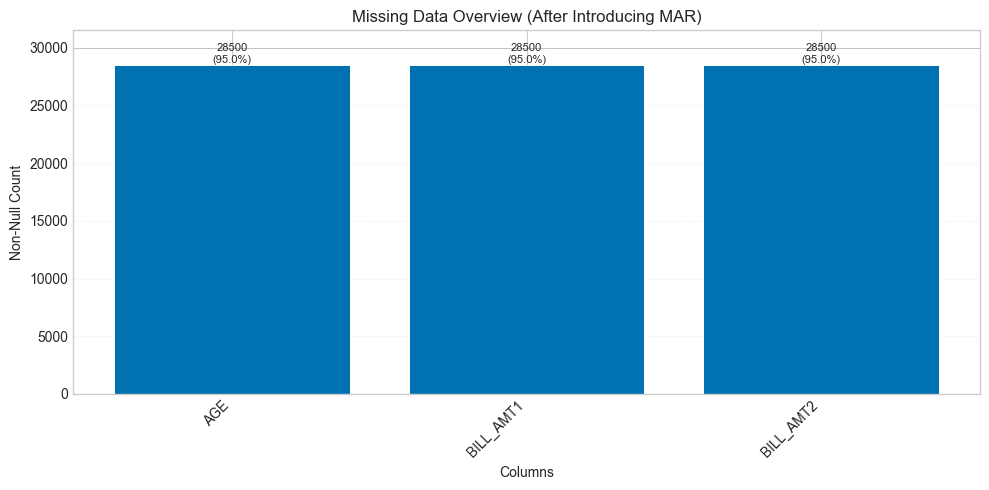

In [4]:
# Calculate missing data statistics
missing_counts = df[mar_cols].isnull().sum()
total_rows = len(df)
present_counts = total_rows - missing_counts

# Create figure
plt.figure(figsize=(10, 5))

# Create bar positions
x_pos = np.arange(len(mar_cols))

# Plot bars showing present data
plt.bar(x_pos, present_counts, color=color_blind_palette[0], edgecolor='white', linewidth=0.7)

# Add a reference line at total rows
plt.axhline(y=total_rows, color='black', linestyle='-', linewidth=0.5, alpha=0.3)

# Customize the plot
plt.xlabel('Columns')
plt.ylabel('Non-Null Count')
plt.title('Missing Data Overview (After Introducing MAR)')
plt.xticks(x_pos, mar_cols, rotation=45, ha='right')
plt.ylim(0, total_rows * 1.05)  # Add 5% padding at top

# Add grid for better readability
plt.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)

# Add count labels on top of bars (optional)
for i, (col, count) in enumerate(zip(mar_cols, present_counts)):
    plt.text(i, count, f'{count}\n({count/total_rows*100:.1f}%)', 
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

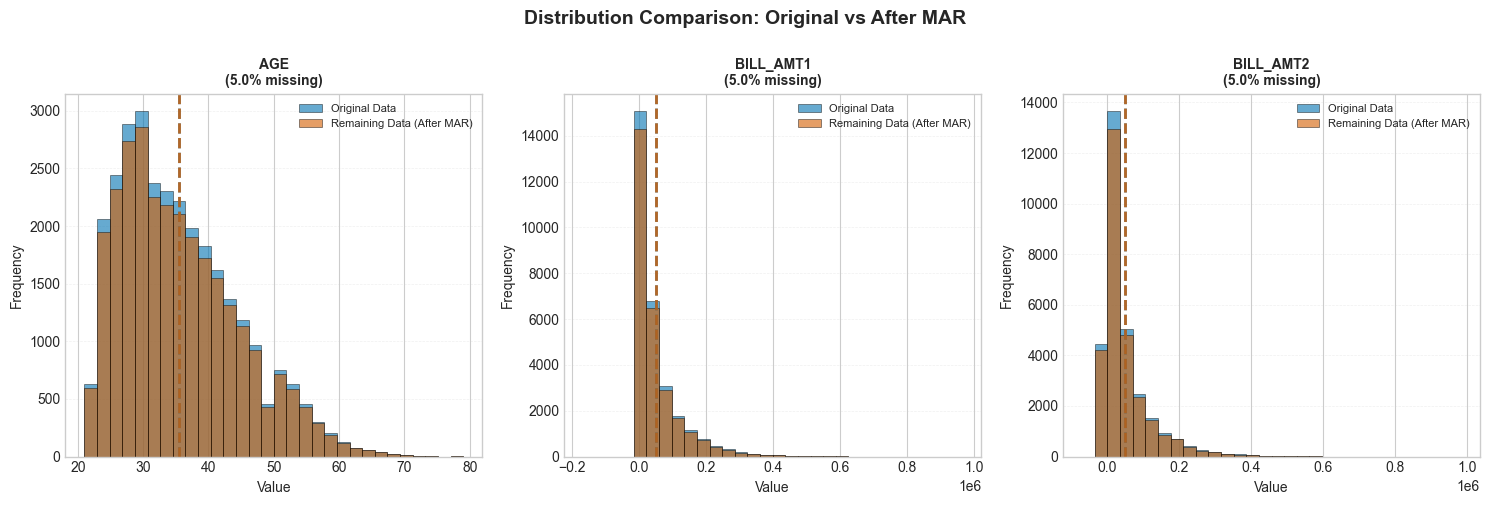

In [5]:

def plot_distribution_comparison(df_original, df_with_missing, cols, color_palette):
    """
    Create histograms comparing original data vs data after missing values introduced
    """
    n_cols = len(cols)
    n_rows = (n_cols + 2) // 3  # 3 columns per row
    
    fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_cols > 1 else [axes]
    
    for idx, col in enumerate(cols):
        ax = axes[idx]
        
        # Get data
        original_data = df_original[col].dropna()
        remaining_data = df_with_missing[col].dropna()
        
        # Calculate bins based on original data
        bins = 30
        
        # Plot original distribution
        ax.hist(original_data, bins=bins, alpha=0.6, 
                color=color_palette[0], label='Original Data', 
                edgecolor='black', linewidth=0.5)
        
        # Plot remaining data distribution
        ax.hist(remaining_data, bins=bins, alpha=0.6, 
                color=color_palette[1] if len(color_palette) > 1 else 'orange', 
                label='Remaining Data (After MAR)', 
                edgecolor='black', linewidth=0.5)
        
        # Add statistics
        missing_pct = (len(original_data) - len(remaining_data)) / len(original_data) * 100
        
        ax.set_title(f'{col}\n({missing_pct:.1f}% missing)', fontsize=10, fontweight='bold')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
        ax.legend(loc='upper right', fontsize=8)
        ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)
        
        # Add mean lines
        ax.axvline(original_data.mean(), color=color_palette[0], 
                   linestyle='--', linewidth=2, alpha=0.8, label=f'Original Mean: {original_data.mean():.2f}')
        ax.axvline(remaining_data.mean(), color=color_palette[1] if len(color_palette) > 1 else 'orange', 
                   linestyle='--', linewidth=2, alpha=0.8, label=f'Remaining Mean: {remaining_data.mean():.2f}')
        
    # Hide empty subplots
    for idx in range(len(cols), len(axes)):
        axes[idx].set_visible(False)
    
    plt.suptitle('Distribution Comparison: Original vs After MAR', 
                 fontsize=14, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()

# Usage:
plot_distribution_comparison(data, df, mar_cols, color_blind_palette)

<div style="
background-color: #f9f2fb;
padding: 18px 22px;
margin: 18px 0;
border-radius: 8px;
border-left: 5px solid #d7b3eb;
box-shadow: 0 4px 12px rgba(0,0,0,0.05);
font-family: 'Segoe UI','Roboto',sans-serif;
">

<h3 style="
font-size: 1.3em;
font-weight: 600;
color: #a67acc;
margin: 0 0 8px 0;
">
Impact of Missing at Random (MAR) on Data Distribution
</h3>

<p style="
color: #8f6fc1;
margin: 0;
font-size: 0.95em;
font-weight: 400;
line-height: 1.6;
">
We introduced missing values using the <b>MAR (Missing At Random)</b> mechanism, where data is randomly removed based on other variables. 
The histograms above compare the <b>original complete data distribution</b> (blue) against the <b>remaining data after introducing missingness</b> (orange). 
The similarity in distributions confirms that MAR largely <b>preserves the underlying data patterns</b>, though minor shifts in means may occur due to the dependency structure.
</p>

</div>


<div style="
    background-color: #f0f4f8;
    padding: 18px 22px;
    margin: 18px 0;
    border-radius: 8px;
    border-left: 5px solid #42a5f5;
    box-shadow: 0 4px 12px rgba(0,0,0,0.08);
    font-family: 'Segoe UI', 'Roboto', sans-serif;
">
    <h3 style="
        font-size: 1.3em;
        font-weight: 600;
        color: #263238;
        margin: 0 0 8px 0;
    ">
        2. Imputation Strategy 1: Simple Imputation (Baseline)
    </h3>
    <p style="
        color: #546e7a;
        margin: 0 0 10px 0;
        font-size: 0.95em;
        font-weight: 400;
        line-height: 1.6;
    ">
        For the first baseline strategy, we apply <b>Median Imputation</b> to fill the artificially introduced missing values in <b>Dataset A</b>.
    </p>

<p style="
        color: #546e7a;
        margin: 0 0 10px 0;
        font-size: 0.95em;
        font-weight: 400;
        line-height: 1.6;
    ">
        <b>Imputation Method:</b><br>
        Each missing value (NaN) in a column (e.g., <code style="color: #1e88e5; background-color: #e3f2fd; padding: 2px 6px; border-radius: 4px;">AGE</code>) 
        is replaced by the <b>median</b> of the non-missing values in that column.
    </p>

<p style="
        color: #546e7a;
        margin: 0 0 10px 0;
        font-size: 0.95em;
        font-weight: 400;
        line-height: 1.6;
    ">
        <b>Median vs. Mean:</b><br>
        The median is generally preferred over the mean for imputation in financial or real-world datasets because it is <b>robust to outliers</b>. 
        Outliers (extremely large or small values) can skew the mean, producing unrepresentative imputed values. 
        The median, representing the 50th percentile, provides a more stable and accurate estimate of central tendency.
    </p>
</div>


In [8]:

# Create Dataset A (copy of df with missing values)
dataset_A = df.copy()

# Identify columns with missing values
cols_with_missing = dataset_A.columns[dataset_A.isnull().any()]
print(f"Columns with missing values: {list(cols_with_missing)}")

# Apply Median Imputation
for col in cols_with_missing:
    median_value = dataset_A[col].median()
    dataset_A[col].fillna(median_value, inplace=True)

print("✅ Simple Median Imputation Applied Successfully! (Dataset A created)")

# Verify there are no missing values
dataset_A.isnull().sum()[cols_with_missing]


Columns with missing values: ['AGE', 'BILL_AMT1', 'BILL_AMT2']
✅ Simple Median Imputation Applied Successfully! (Dataset A created)


AGE          0
BILL_AMT1    0
BILL_AMT2    0
dtype: int64

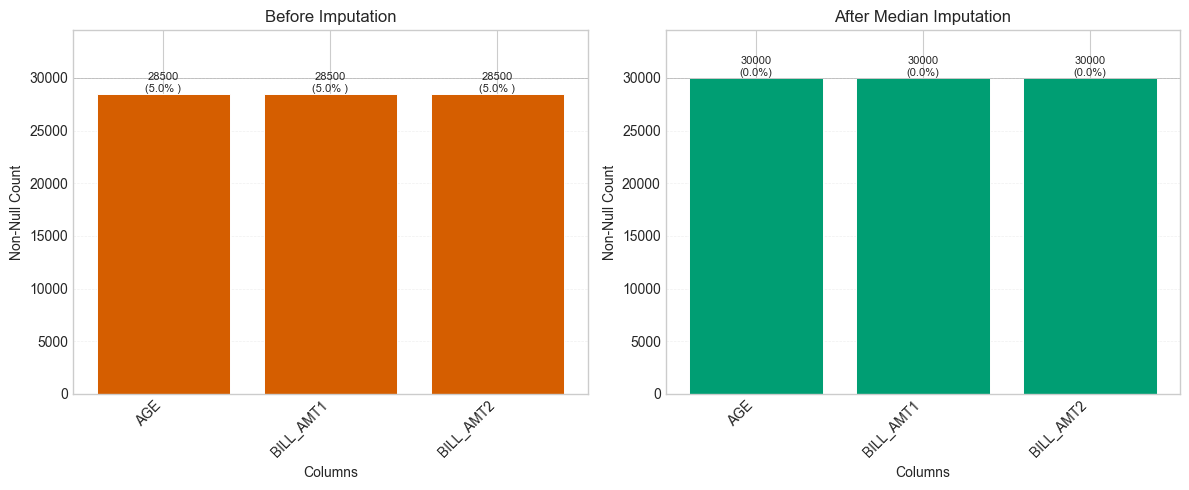

In [9]:
# Compare before vs after imputation visually
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Calculate missing data statistics
# Before imputation
missing_before = df[cols_with_missing].isnull().sum()
total_rows = len(df)
present_before = total_rows - missing_before

# After imputation
missing_after = dataset_A[cols_with_missing].isnull().sum()
present_after = total_rows - missing_after

# Create bar positions
x_pos = np.arange(len(cols_with_missing))

# Left plot: Before Imputation
axes[0].bar(x_pos, present_before, color=color_blind_palette[1], 
            edgecolor='white', linewidth=0.7)
axes[0].axhline(y=total_rows, color='black', linestyle='-', linewidth=0.5, alpha=0.3)
axes[0].set_xlabel('Columns')
axes[0].set_ylabel('Non-Null Count')
axes[0].set_title('Before Imputation')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(cols_with_missing, rotation=45, ha='right')
axes[0].set_ylim(0, total_rows * 1.15)
axes[0].grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)

# Add count labels
for i, count in enumerate(present_before):
    missing_pct = (total_rows - count) / total_rows * 100
    axes[0].text(i, count, f'{count}\n({missing_pct:.1f}% )', 
                 ha='center', va='bottom', fontsize=8)

# Right plot: After Imputation
axes[1].bar(x_pos, present_after, color=color_blind_palette[2], 
            edgecolor='white', linewidth=0.7)
axes[1].axhline(y=total_rows, color='black', linestyle='-', linewidth=0.5, alpha=0.3)
axes[1].set_xlabel('Columns')
axes[1].set_ylabel('Non-Null Count')
axes[1].set_title('After Median Imputation')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(cols_with_missing, rotation=45, ha='right')
axes[1].set_ylim(0, total_rows * 1.15)
axes[1].grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)

# Add count labels
for i, count in enumerate(present_after):
    missing_pct = (total_rows - count) / total_rows * 100
    axes[1].text(i, count, f'{count}\n({missing_pct:.1f}%)', 
                 ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

<div style="
background-color: #eef9f0;
padding: 18px 22px;
margin: 18px 0;
border-radius: 8px;
border-left: 5px solid #43a047;
box-shadow: 0 4px 12px rgba(0,0,0,0.08);
font-family: 'Segoe UI', 'Roboto', sans-serif;
">

<h2 style="
font-size: 1.45em;
font-weight: 700;
color: #1b5e20;
margin-bottom: 10px;
">
Imputation Strategy: Median Imputation
</h2>

<hr style="border: none; border-top: 1px solid #a5d6a7; margin: 10px 0;">

<h3 style="
font-size: 1.2em;
font-weight: 600;
color: #1b5e20;
margin-top: 10px;
">
The Simple Yet Powerful Baseline
</h3>

<p style="
color: #2e7d32;
font-size: 0.95em;
line-height: 1.6;
margin: 0 0 10px 0;
">
Before building sophisticated models to predict missing data, we start with a <b>simple and reliable approach</b> — <b>median imputation</b>.
</p>

<p style="
color: #2e7d32;
font-size: 0.95em;
line-height: 1.6;
margin: 0 0 10px 0;
">
In this step, we create a new dataset, <b>Dataset A</b>, where all missing values are replaced by the <b>median of their respective columns</b>. This serves as our baseline method for comparison with more advanced imputation strategies.
</p>

<h3 style="
font-size: 1.15em;
font-weight: 600;
color: #1b5e20;
margin-top: 15px;
">
Why Median and Not Mean?
</h3>

<p style="
color: #2e7d32;
font-size: 0.95em;
line-height: 1.6;
margin: 0;
">
While both mean and median represent measures of central tendency, the <b>median is more robust in the presence of outliers</b>. 
Extreme values can distort the mean significantly, but the median remains stable — making it a reliable choice for skewed financial or demographic data.
</p>

<p style="
color: #2e7d32;
font-size: 0.95em;
margin-top: 10px;
line-height: 1.6;
">
Let's visualize this with a real example to see how median imputation preserves the core distribution even when outliers exist.
</p>

</div>


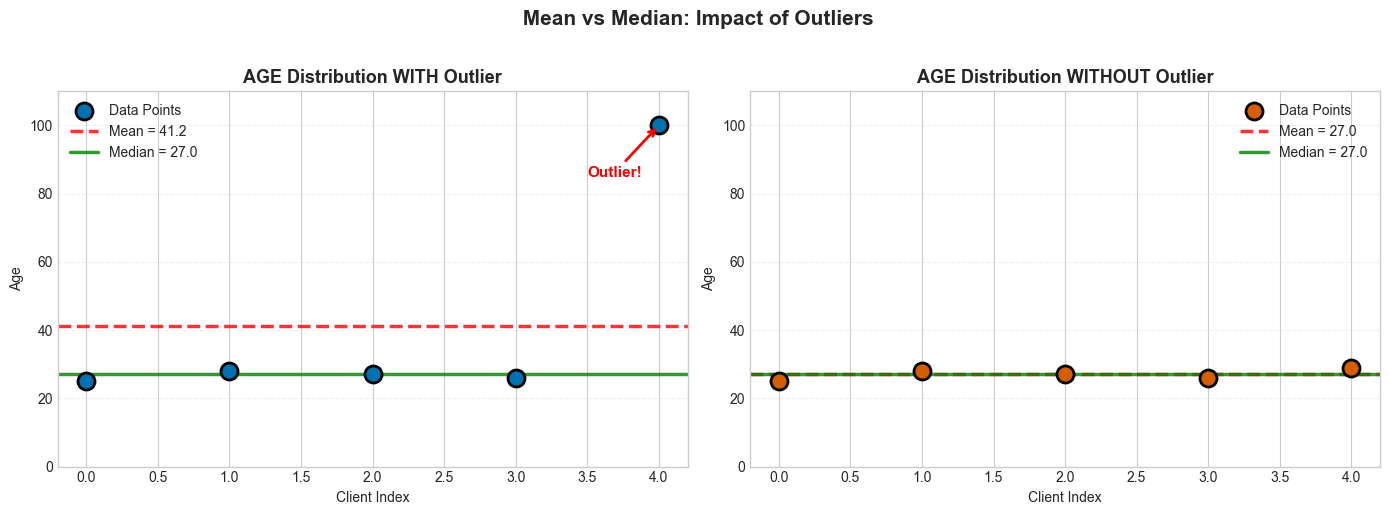


 MEAN vs MEDIAN COMPARISON

Scenario                  Mean            Median         
------------------------------------------------------------
With Outlier (100)        41.20           27.00          
Without Outlier           27.00           27.00          
Difference                14.20           0.00           

 Median remains stable despite the outlier!
 Mean is pulled significantly by the extreme value.



In [10]:
# Example: AGE distribution with an outlier
ages_with_outlier = [25, 28, 27, 26, 100]
ages_without_outlier = [25, 28, 27, 26, 29]

# Calculate statistics
mean_with = np.mean(ages_with_outlier)
median_with = np.median(ages_with_outlier)
mean_without = np.mean(ages_without_outlier)
median_without = np.median(ages_without_outlier)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: With Outlier
axes[0].scatter(range(len(ages_with_outlier)), ages_with_outlier, 
                s=150, c=color_blind_palette[0], edgecolor='black', linewidth=2, 
                zorder=3, label='Data Points')
axes[0].axhline(y=mean_with, color='red', linestyle='--', linewidth=2.5, 
                label=f'Mean = {mean_with:.1f}', alpha=0.8)
axes[0].axhline(y=median_with, color='green', linestyle='-', linewidth=2.5, 
                label=f'Median = {median_with:.1f}', alpha=0.8)
axes[0].set_title('AGE Distribution WITH Outlier', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Client Index')
axes[0].set_ylabel('Age')
axes[0].set_ylim(0, 110)
axes[0].legend(loc='upper left', fontsize=10)
axes[0].grid(axis='y', alpha=0.3, linestyle='--')
axes[0].annotate('Outlier!', xy=(4, 100), xytext=(3.5, 85),
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                fontsize=11, color='red', fontweight='bold')

# Plot 2: Without Outlier
axes[1].scatter(range(len(ages_without_outlier)), ages_without_outlier, 
                s=150, c=color_blind_palette[1], edgecolor='black', linewidth=2, 
                zorder=3, label='Data Points')
axes[1].axhline(y=mean_without, color='red', linestyle='--', linewidth=2.5, 
                label=f'Mean = {mean_without:.1f}', alpha=0.8)
axes[1].axhline(y=median_without, color='green', linestyle='-', linewidth=2.5, 
                label=f'Median = {median_without:.1f}', alpha=0.8)
axes[1].set_title('AGE Distribution WITHOUT Outlier', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Client Index')
axes[1].set_ylabel('Age')
axes[1].set_ylim(0, 110)
axes[1].legend(loc='upper right', fontsize=10)
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

plt.suptitle(' Mean vs Median: Impact of Outliers', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Print comparison table
print("\n" + "="*60)
print(" MEAN vs MEDIAN COMPARISON")
print("="*60)
print(f"\n{'Scenario':<25} {'Mean':<15} {'Median':<15}")
print("-"*60)
print(f"{'With Outlier (100)':<25} {mean_with:<15.2f} {median_with:<15.2f}")
print(f"{'Without Outlier':<25} {mean_without:<15.2f} {median_without:<15.2f}")
print(f"{'Difference':<25} {abs(mean_with-mean_without):<15.2f} {abs(median_with-median_without):<15.2f}")
print("="*60)
print("\n Median remains stable despite the outlier!")
print(" Mean is pulled significantly by the extreme value.\n")

<div style="
background-color: #fff8f1;
padding: 18px 22px;
margin: 18px 0;
border-radius: 8px;
border-left: 5px solid #f57c00;
box-shadow: 0 4px 12px rgba(0,0,0,0.08);
font-family: 'Segoe UI', 'Roboto', sans-serif;
">

<h3 style="
font-size: 1.2em;
font-weight: 600;
color: #263238;
margin-bottom: 10px;
">
Key Observations
</h3>

<table style="
width: 100%;
border-collapse: collapse;
margin: 10px 0;
font-size: 0.95em;
color: #455a64;
">
<tr style="background-color: #ffe0b2;">
<th style="text-align: left; padding: 8px; border-bottom: 1px solid #e0e0e0;">Scenario</th>
<th style="text-align: left; padding: 8px; border-bottom: 1px solid #e0e0e0;">Mean</th>
<th style="text-align: left; padding: 8px; border-bottom: 1px solid #e0e0e0;">Median</th>
</tr>
<tr>
<td style="padding: 8px; border-bottom: 1px solid #e0e0e0;">Ages: 25, 28, 27, 26, <b>100</b></td>
<td style="padding: 8px; border-bottom: 1px solid #e0e0e0;">41.2</td>
<td style="padding: 8px; border-bottom: 1px solid #e0e0e0;">27</td>
</tr>
<tr>
<td style="padding: 8px;">Ages: 25, 28, 27, 26, 29</td>
<td style="padding: 8px;">27.0</td>
<td style="padding: 8px;">27</td>
</tr>
</table>

<p style="
color: #546e7a;
font-size: 0.95em;
line-height: 1.6;
margin-top: 10px;
">
<b>Notice:</b> A single extreme value (age = 100) pulls the mean far away from the true "center" of the data. However, the <b>median remains stable</b> — it is <b>resistant to outliers</b> and better represents the underlying distribution of the majority of clients.
</p>

<hr style="border: none; border-top: 1px solid #ffe0b2; margin: 18px 0;">

<h3 style="
font-size: 1.15em;
font-weight: 600;
color: #263238;
margin-bottom: 8px;
">
Why This Matters for Credit Risk Data
</h3>

<p style="color: #546e7a; font-size: 0.95em; line-height: 1.6;">
In financial datasets, such as credit card records, features like <b>BILL_AMT</b> or <b>LIMIT_BAL</b> often contain extreme values due to:
</p>

<ul style="color: #546e7a; font-size: 0.9em; padding-left: 22px; margin: 0;">
<li>High-spending customers</li>
<li>High-income clients</li>
<li>Unusual transactions or data entry errors</li>
</ul>

<p style="color: #546e7a; font-size: 0.95em; margin-top: 10px; line-height: 1.6;">
<b>Using the mean would:</b>
</p>
<ul style="color: #d84315; font-size: 0.9em; padding-left: 22px; margin: 0;">
<li>Distort the data</li>
<li>Bias the model toward outliers</li>
<li>Misrepresent typical customer behavior</li>
</ul>

<p style="color: #546e7a; font-size: 0.95em; margin-top: 10px; line-height: 1.6;">
<b>Using the median provides:</b>
</p>
<ul style="color: #2e7d32; font-size: 0.9em; padding-left: 22px; margin: 0;">
<li>A more robust and fair baseline</li>
<li>Better representation of typical values</li>
<li>Stability for skewed distributions (common in credit risk datasets)</li>
</ul>

<hr style="border: none; border-top: 1px solid #ffe0b2; margin: 18px 0;">

<h3 style="
font-size: 1.15em;
font-weight: 600;
color: #263238;
margin-bottom: 8px;
">
Outcome: Dataset A
</h3>

<ul style="color: #546e7a; font-size: 0.9em; padding-left: 22px; margin: 0;">
<li>All missing values are successfully filled</li>
<li>The dataset remains numerically consistent</li>
<li>Distributions are stable and not distorted</li>
<li><b>Dataset A serves as our baseline clean dataset</b> for the classification task</li>
</ul>

<p style="color: #263238; font-weight: 600; margin-top: 18px; font-size: 0.95em;">
Next Step: <span style="color: #f57c00;">Imputation Strategy 2 — Linear Regression Imputation</span>
</p>

</div>


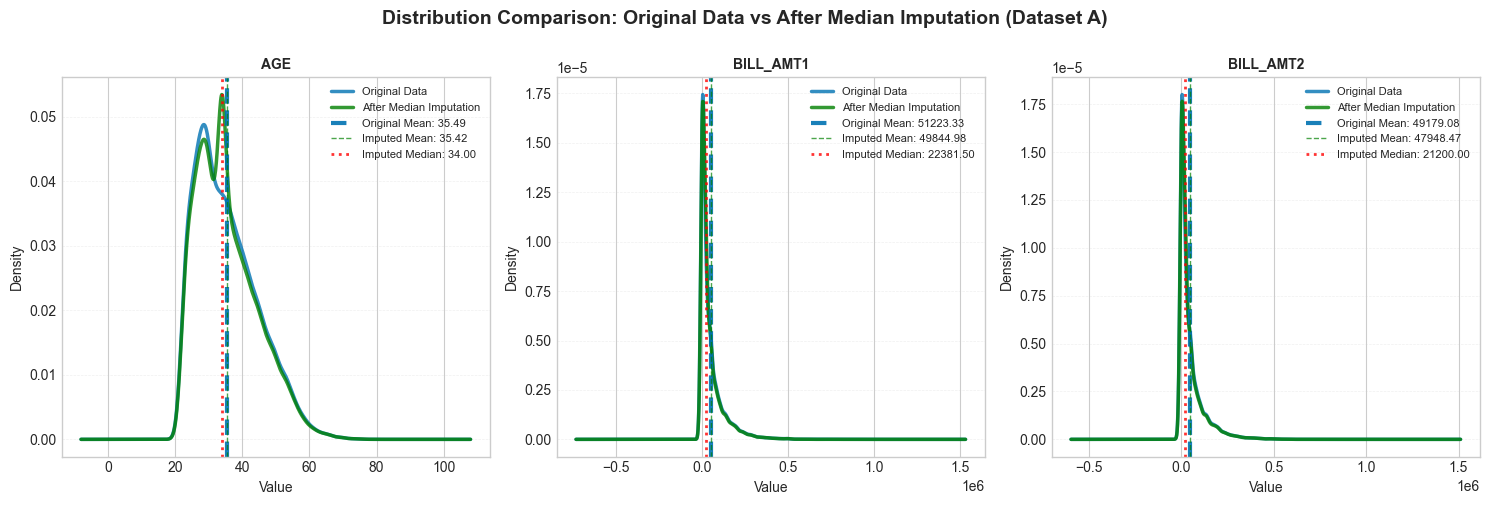

In [11]:
from scipy import stats

def plot_imputation_comparison(df_original, df_imputed, cols, color_palette):
    """
    Create smooth density plots comparing original data vs data after median imputation
    """
    n_cols = len(cols)
    n_rows = (n_cols + 2) // 3  # 3 columns per row
    
    fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_cols > 1 else [axes]
    
    for idx, col in enumerate(cols):
        ax = axes[idx]
        
        # Get data
        original_data = df_original[col]
        imputed_data = df_imputed[col]
        
        # Calculate statistics
        n_missing = df_original[col].isnull().sum()
        median_value = df_original[col].median()
        
        # Create smooth density plots using KDE
        original_data.plot(kind='density', ax=ax, color=color_palette[0], 
                          linewidth=2.5, label='Original Data', alpha=0.8)
        imputed_data.plot(kind='density', ax=ax, color='green', 
                         linewidth=2.5, label='After Median Imputation', alpha=0.8)
        
        ax.set_title(f'{col}', 
                     fontsize=10, fontweight='bold')
        ax.set_xlabel('Value')
        ax.set_ylabel('Density')
        ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)
        
        # Add mean and median lines with labels
        ax.axvline(original_data.mean(), color=color_palette[0], 
                   linestyle='--', linewidth=3, alpha=0.9,
                   label=f'Original Mean: {original_data.mean():.2f}')
        ax.axvline(imputed_data.mean(), color='green', 
                   linestyle='--', linewidth=1, alpha=0.7,
                   label=f'Imputed Mean: {imputed_data.mean():.2f}')
        ax.axvline(median_value, color='red', 
                   linestyle=':', linewidth=2, alpha=0.8, 
                   label=f'Imputed Median: {median_value:.2f}')
        
        # Add legend once with all items
        ax.legend(loc='upper right', fontsize=8)
        
    # Hide empty subplots
    for idx in range(len(cols), len(axes)):
        axes[idx].set_visible(False)
    
    plt.suptitle('Distribution Comparison: Original Data vs After Median Imputation (Dataset A)', 
                 fontsize=14, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()

# Usage:
imputation_cols = ['AGE', 'BILL_AMT1', 'BILL_AMT2']
plot_imputation_comparison(data, dataset_A, imputation_cols, color_blind_palette)

<div style="
background-color: #f3f0fa;
padding: 18px 22px;
margin: 18px 0;
border-radius: 8px;
border-left: 5px solid #9c27b0;
box-shadow: 0 4px 12px rgba(0,0,0,0.08);
font-family: 'Segoe UI', 'Roboto', sans-serif;
">

<h3 style="
font-size: 1.3em;
font-weight: 600;
color: #4a148c;
margin: 0 0 8px 0;
">
Distribution Comparison: Original vs Median Imputation (Dataset A)
</h3>

<p style="
color: #6a1b9a;
font-size: 0.95em;
line-height: 1.6;
margin: 0;
">
The plots compare the distribution of continuous variables before and after applying <b>median imputation</b>. 
The <b>red dotted line</b> represents the median value used to fill missing data, while the <b>dashed lines</b> show the mean values for 
the <b>original (blue)</b> and <b>imputed (green)</b> distributions. 
Notice the artificial spike at the median in the imputed data (green histogram), which demonstrates how simple median imputation can 
<b>distort the original distribution</b> and <b>reduce variance</b> in the dataset.
</p>

</div>


<div style="
background-color: #eef2f6;
padding: 20px 24px;
margin: 20px 0;
border-radius: 8px;
border-left: 5px solid #1976d2;
box-shadow: 0 4px 12px rgba(0,0,0,0.08);
font-family: 'Segoe UI', 'Roboto', sans-serif;
">

<h2 style="
font-size: 1.45em;
font-weight: 700;
color: #263238;
margin-bottom: 10px;
">
3. Imputation Strategy 2: Regression Imputation (Linear)
</h2>

<h3 style="
font-size: 1.2em;
font-weight: 600;
color: #263238;
margin: 10px 0;
">
Linear Regression Imputation
</h3>

<p style="
color: #546e7a;
font-size: 0.95em;
line-height: 1.6;
margin-bottom: 12px;
">
After building our baseline with median imputation, we now take a <b>data-driven approach</b> — using <b>Linear Regression</b> to estimate missing values based on relationships between variables.
</p>

<h3 style="
font-size: 1.15em;
font-weight: 600;
color: #263238;
margin-top: 15px;
">
The Approach
</h3>

<p style="
color: #546e7a;
font-size: 0.95em;
line-height: 1.6;
margin-bottom: 10px;
">
In this step, we focus only on one feature with missing data: <b>AGE</b>. All other columns containing missing values are removed to prevent compounding uncertainty.
</p>

<p style="
color: #546e7a;
font-size: 0.95em;
line-height: 1.6;
margin-bottom: 10px;
">
We then build a <b>Linear Regression model</b> that predicts AGE based on other available features such as education level, bill amounts, and repayment status. The model learns the relationship between <b>AGE</b> and these predictors, and uses that knowledge to estimate missing AGE values.
</p>

<h3 style="
font-size: 1.15em;
font-weight: 600;
color: #263238;
margin-top: 15px;
">
Linear Algebra Behind Regression Imputation
</h3>

<p style="
color: #546e7a;
font-size: 0.95em;
line-height: 1.6;
margin-bottom: 10px;
">
Linear regression finds the best-fit hyperplane by solving the fundamental equation:
</p>

<p style="
font-family: 'Courier New', monospace;
background-color: #e3f2fd;
padding: 10px;
border-radius: 5px;
border-left: 4px solid #1976d2;
color: #0d47a1;
font-size: 0.95em;
margin: 10px 0;
">
ŷ = Xβ + ε
</p>

<ul style="
color: #546e7a;
font-size: 0.9em;
padding-left: 22px;
margin: 0;
list-style-type: square;
">
<li><b>ŷ</b> — predicted AGE values (our target)</li>
<li><b>X</b> — matrix of predictor variables (all non-missing features)</li>
<li><b>β</b> — coefficient vector (weights learned by the model)</li>
<li><b>ε</b> — residual error term</li>
</ul>

<p style="
color: #546e7a;
font-size: 0.95em;
margin-top: 12px;
line-height: 1.6;
">
The optimal coefficient vector <b>β</b> is obtained using the <b>Normal Equation</b>:
</p>

<p style="
font-family: 'Courier New', monospace;
background-color: #e3f2fd;
padding: 10px;
border-radius: 5px;
border-left: 4px solid #1976d2;
color: #0d47a1;
font-size: 0.95em;
margin: 10px 0;
">
β = (X<sup>T</sup>X)<sup>-1</sup>X<sup>T</sup>y
</p>

<p style="
color: #546e7a;
font-size: 0.95em;
line-height: 1.6;
margin-bottom: 0;
">
This closed-form solution minimizes the sum of squared errors between the predicted and actual AGE values. Once we compute <b>β</b>, we can impute the missing AGE entries by multiplying the feature matrix of incomplete observations with the learned coefficients.
</p>

</div>


In [13]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 1: Create Dataset B (copy from df with missing values)
dataset_B = df.copy()

# Step 2: Choose the column to impute (e.g., 'AGE')
target_col = 'AGE'

# Step 3: Remove other columns that also have missing values
cols_with_missing = dataset_B.columns[dataset_B.isnull().any()]
other_missing_cols = [col for col in cols_with_missing if col != target_col]
dataset_B = dataset_B.drop(columns=other_missing_cols)

print(f"Removed columns with other missing values: {other_missing_cols}")
print(f"Target column for regression imputation: {target_col}")

# Step 4: Split data into two subsets: rows with and without missing AGE
train_data = dataset_B[dataset_B[target_col].notnull()]
test_data = dataset_B[dataset_B[target_col].isnull()]

# Step 5: Separate features (X) and target (y)
X_train = train_data.drop(columns=[target_col, 'ID'])  # Drop ID to avoid bias
y_train = train_data[target_col]

# Align test data with same feature columns
X_test = test_data.drop(columns=[target_col, 'ID'])

# Step 6: Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Step 7: Predict missing AGE values
predicted_ages = lin_reg.predict(X_test)

# Step 8: Fill predicted values back into the dataset
dataset_B.loc[dataset_B[target_col].isnull(), target_col] = predicted_ages

print("✅ Linear Regression Imputation Completed Successfully for 'AGE'")

# Step 9: Confirm no missing AGE values remain
print(f"Remaining Missing Values in AGE: {dataset_B['AGE'].isnull().sum()}")


Removed columns with other missing values: ['BILL_AMT1', 'BILL_AMT2']
Target column for regression imputation: AGE
✅ Linear Regression Imputation Completed Successfully for 'AGE'
Remaining Missing Values in AGE: 0


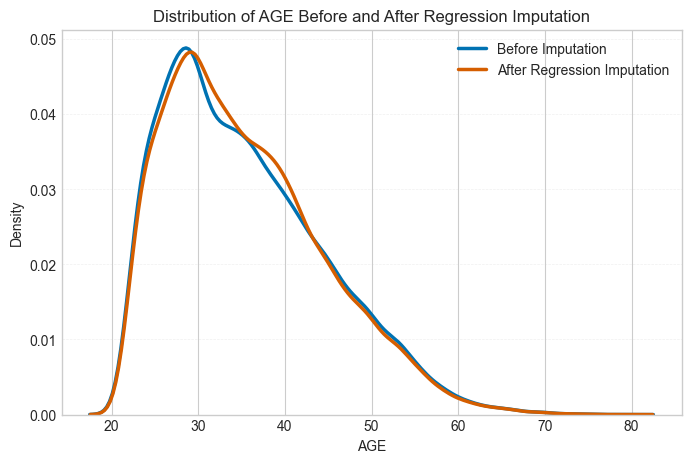

In [14]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data['AGE'], label='Before Imputation', color=color_blind_palette[0], linewidth=2.5)
sns.kdeplot(dataset_B['AGE'], label='After Regression Imputation', color=color_blind_palette[1], linewidth=2.5)
plt.legend()
plt.title("Distribution of AGE Before and After Regression Imputation")
plt.xlabel("AGE")
plt.ylabel("Density")
plt.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)
plt.show()

<div style="background-color:#fff7f0; border-left:6px solid #ff8c42; padding:20px; border-radius:8px; font-family:'Segoe UI','Roboto',sans-serif; color:#2c2c2c;">

<h3 style="color:#ff6600;"> Underlying Assumption — "Missing At Random (MAR)"</h3>

<p>
Linear regression imputation assumes that the missing values are <b>Missing At Random (MAR)</b>.
</p>

<p>
This means that the <b>probability of a value being missing depends on other observed variables</b>, but not on the missing value itself.
</p>

<div style="margin-top:15px; padding:15px; background-color:#ffe8d4; border-radius:6px;">
<b>Example:</b><br>
✅ If younger clients are less likely to report their age, but we still know their payment history and credit limit, we can use those correlated features to predict their missing age accurately.<br>
❌ In contrast, if the missingness depended directly on AGE itself (e.g., people with extremely high age tend to hide it), the data would be <b>Missing Not At Random (MNAR)</b> — and regression would not fix the bias.
</div>

<h3 style="color:#ff6600; margin-top:25px;"> Why Regression Imputation is Useful</h3>

<div style="padding:10px 0;">
 <b>Advantages:</b>
<ul style="margin-left:20px;">
<li>Uses <b>relationships between variables</b>, rather than global statistics like mean or median</li>
<li>Preserves <b>multivariate correlations</b>, leading to more realistic imputations</li>
<li>The imputed values are <b>data-informed</b> rather than arbitrary</li>
<li>Leverages the entire feature space to make educated predictions</li>
</ul>

 <b>Limitations:</b>
<ul style="margin-left:20px;">
<li>May introduce <b>model bias</b> if regression is misspecified or MAR assumption fails</li>
<li>Assumes <b>linear relationships</b> between predictors and target</li>
<li>Can <b>underestimate variance</b> (imputed values fall exactly on regression line)</li>
<li>Sensitive to <b>outliers</b> and <b>multicollinearity</b></li>
</ul>
</div>

<h3 style="color:#ff6600; margin-top:25px;">Mathematical Insight</h3>

<p>
The regression imputation essentially <b>projects incomplete data onto a subspace</b> defined by the observed features, then uses that projection to estimate missing values. 
This makes it fundamentally different from median imputation, which ignores all inter-feature dependencies and relies only on a single global statistic.
</p>

</div>


<div style="
background-color: #eef2f6;
padding: 20px 24px;
margin: 20px 0;
border-radius: 8px;
border-left: 5px solid #1976d2;
box-shadow: 0 4px 12px rgba(0,0,0,0.08);
font-family: 'Segoe UI', 'Roboto', sans-serif;
">

<h2 style="
font-size: 1.45em;
font-weight: 700;
color: #263238;
margin-bottom: 10px;
">
4. Imputation Strategy 3: Regression Imputation (Non-Linear)
</h2>

<h3 style="
font-size: 1.2em;
font-weight: 600;
color: #263238;
margin: 10px 0;
">
Non-Linear Regression Imputation (K-Nearest Neighbors)
</h3>

<p style="
color: #546e7a;
font-size: 0.95em;
line-height: 1.6;
margin-bottom: 12px;
">
After using linear regression to impute missing AGE values, we now step into the realm of <b>non-linear modeling</b>, where relationships between features may not follow simple straight lines.
</p>

<p style="
color: #546e7a;
font-size: 0.95em;
line-height: 1.6;
margin-bottom: 12px;
">
In this approach, we create <b>Dataset C</b> and continue to focus on the same target column (<b>AGE</b>) as before. However, instead of assuming a linear relationship, we use <b>K-Nearest Neighbors (KNN) Regression</b> — a powerful, instance-based learning algorithm that <b>makes no assumptions</b> about the underlying data distribution or functional form of relationships between features.
</p>

<p style="
color: #546e7a;
font-size: 0.95em;
line-height: 1.6;
margin-bottom: 0;
">
KNN regression predicts missing values by averaging the observed target values of the <b>k most similar instances</b> in the dataset, capturing local patterns and non-linear interactions that linear models may miss.
</p>

</div>


<div style="
background-color: #edf7ed;
padding: 20px 24px;
margin: 20px 0;
border-radius: 8px;
border-left: 5px solid #2e7d32;
box-shadow: 0 4px 12px rgba(0,0,0,0.08);
font-family: 'Segoe UI','Roboto',sans-serif;
color: #2c3e50;
">

<h3 style="color:#2e7d32;">How KNN Works</h3>

<p style="font-size:0.95em; line-height:1.6; margin-bottom:10px;">
KNN operates on the <b>principle of similarity</b> and local averaging:
</p>

<p style="font-size:0.95em; line-height:1.6; margin-bottom:10px;">
<b>For each client with a missing age:</b>
</p>

<ol style="font-size:0.95em; line-height:1.6; margin-left:20px; margin-bottom:10px;">
<li>Calculate the <b>distance</b> to all other clients with known ages using their observed features (education, payment history, bill amounts, etc.)</li>
<li>Identify the <b>k most similar clients</b> (neighbors) based on these distances</li>
<li><b>Impute the missing value</b> as the average (or weighted average) of those k neighbors' ages</li>
</ol>

<p style="font-size:0.95em; line-height:1.6; margin-bottom:10px;">
This approach naturally adapts to <b>non-linear and complex patterns</b>, where relationships between variables are not simple straight lines or curves.
</p>

<hr style="border: none; border-top: 1px solid #a5d6a7; margin: 15px 0;">

<h3 style="color:#2e7d32;"> Mathematical Foundation of KNN</h3>

<p style="font-size:0.95em; line-height:1.6; margin-bottom:10px;"><b>Distance Metrics:</b></p>

<p style="font-family:'Courier New', monospace; background-color:#e8f5e9; padding:10px; border-radius:5px; border-left:4px solid #2e7d32; color:#1b5e20; font-size:0.95em; margin-bottom:10px;">
d(x, x') = √(Σᵢ(xᵢ - x'ᵢ)²)
</p>

<ul style="font-size:0.95em; line-height:1.6; margin-left:22px; margin-bottom:10px;">
<li><b>x</b> — feature vector of the observation with missing value</li>
<li><b>x'</b> — feature vector of a potential neighbor</li>
<li><b>xᵢ, x'ᵢ</b> — individual feature values</li>
</ul>

<p style="font-size:0.95em; line-height:1.6; margin-bottom:10px;"><b>Weighted KNN:</b></p>

<p style="font-family:'Courier New', monospace; background-color:#e8f5e9; padding:10px; border-radius:5px; border-left:4px solid #2e7d32; color:#1b5e20; font-size:0.95em; margin-bottom:10px;">
ŷ = Σᵢ wᵢ · yᵢ / Σᵢ wᵢ
</p>

<p style="font-size:0.95em; line-height:1.6; margin-bottom:10px;">
Weights are typically: <b>wᵢ = 1 / d(x, xᵢ)</b> — closer neighbors have more influence.
</p>

<hr style="border: none; border-top: 1px solid #a5d6a7; margin: 15px 0;">

<h3 style="color:#2e7d32;"> Why Use a Non-Linear Model?</h3>

<p style="font-size:0.95em; line-height:1.6; margin-bottom:10px;">
In real-world credit data, relationships are often <b>complex and non-linear</b>:
</p>

<ul style="font-size:0.95em; line-height:1.6; margin-left:22px; margin-bottom:10px;">
<li>Age might influence credit behavior differently across income levels or education groups</li>
<li>Younger and older clients might both have lower default rates, forming a <b>U-shaped pattern</b></li>
<li>The relationship between bill amounts and age may vary across different credit limit ranges</li>
</ul>

<p style="font-size:0.95em; line-height:1.6; margin-bottom:10px;">
Linear regression would oversimplify these patterns. Non-linear models like KNN or Decision Trees can capture curvatures, interactions, and local variations, producing more realistic imputations.
</p>

<hr style="border: none; border-top: 1px solid #a5d6a7; margin: 15px 0;">

<h3 style="color:#2e7d32;">Hyperparameter: Choosing k</h3>

<p style="font-size:0.95em; line-height:1.6; margin-bottom:10px;">
The choice of <b>k (number of neighbors)</b> is critical:
</p>

<ul style="font-size:0.95em; line-height:1.6; margin-left:22px; margin-bottom:10px;">
<li><b>Small k (e.g., k=1-3)</b>:<br>✅ Captures fine-grained local patterns<br>❌ Highly sensitive to noise and outliers<br>❌ High variance, low bias</li>
<li><b>Large k (e.g., k=20-50)</b>:<br>✅ More stable, less sensitive to noise<br>❌ May oversimplify and miss local patterns<br>❌ Low variance, higher bias</li>
</ul>

<p style="font-size:0.95em; line-height:1.6; margin-bottom:0;">
<b>Optimal k</b> is typically chosen through <b>cross-validation</b> to balance bias and variance.
</p>

</div>


In [15]:

# Step 1: Create Dataset C (copy from df with missing values)
dataset_C = df.copy()

# Step 2: Choose the same target column ('AGE')
target_col = 'AGE'

# Step 3: Remove other columns that have missing values
cols_with_missing = dataset_C.columns[dataset_C.isnull().any()]
other_missing_cols = [col for col in cols_with_missing if col != target_col]
dataset_C = dataset_C.drop(columns=other_missing_cols)

print(f"Removed columns with other missing values: {other_missing_cols}")
print(f"Target column for non-linear imputation: {target_col}")

# Step 4: Split data into training (non-missing AGE) and test (missing AGE)
train_data = dataset_C[dataset_C[target_col].notnull()]
test_data = dataset_C[dataset_C[target_col].isnull()]

# Step 5: Separate features and target
X_train = train_data.drop(columns=[target_col, 'ID'])
y_train = train_data[target_col]
X_test = test_data.drop(columns=[target_col, 'ID'])

# Step 6: Scale features for distance-based methods like KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Train a non-linear regression model (KNN Regressor)
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_scaled, y_train)

# Step 8: Predict missing AGE values
predicted_ages_knn = knn_reg.predict(X_test_scaled)

# Step 9: Fill in the predicted values back to dataset
dataset_C.loc[dataset_C[target_col].isnull(), target_col] = predicted_ages_knn

print("✅ Non-Linear (KNN) Regression Imputation Completed Successfully for 'AGE'")

# Step 10: Confirm imputation
print(f"Remaining Missing Values in AGE: {dataset_C['AGE'].isnull().sum()}")


Removed columns with other missing values: ['BILL_AMT1', 'BILL_AMT2']
Target column for non-linear imputation: AGE
✅ Non-Linear (KNN) Regression Imputation Completed Successfully for 'AGE'
Remaining Missing Values in AGE: 0


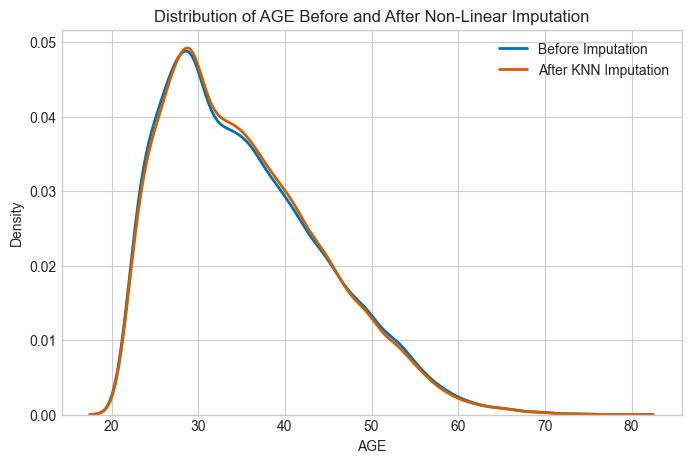

In [16]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data['AGE'], label='Before Imputation', color=color_blind_palette[0], lw=2)
sns.kdeplot(dataset_C['AGE'], label='After KNN Imputation', color=color_blind_palette[1], lw=2)
plt.title("Distribution of AGE Before and After Non-Linear Imputation")
plt.xlabel("AGE")
plt.ylabel("Density")
plt.legend()
plt.show()


<div style="background-color:#fff7f0; border-left:6px solid #ff8c42; padding:20px; border-radius:8px; font-family:'Segoe UI','Roboto',sans-serif; color:#2c2c2c;">

<h3 style="color:#ff6600;"> Underlying Assumption: Still "Missing At Random (MAR)"</h3>

<p style="font-size:0.95em; line-height:1.6; margin-bottom:10px;">
Just like the linear model, non-linear regression assumes that <b>missing values depend on other observed variables</b> — not on the missing value itself.
</p>

<p style="font-size:0.95em; line-height:1.6; margin-bottom:10px;">
<b>MAR Assumption:</b>
<ul style="margin-left:20px;">
<li>The probability that AGE is missing may depend on education level, credit limit, or payment history</li>
<li>But it does <b>NOT</b> depend on the actual age value itself</li>
</ul>
</p>

<p style="font-size:0.95em; line-height:1.6; margin-bottom:10px;">
Thus, we rely on patterns from available features to infer what is missing. KNN is particularly well-suited for MAR because it leverages <b>multivariate similarity</b> rather than assuming a specific functional form.
</p>

<hr style="border: none; border-top: 1px solid #ffd9b3; margin: 15px 0;">

<h3 style="color:#ff6600;"> Geometric Intuition</h3>

<p style="font-size:0.95em; line-height:1.6; margin-bottom:10px;">
Think of KNN as creating a <b>local neighborhood</b> in feature space:
</p>

<ul style="margin-left:22px; font-size:0.95em; line-height:1.6; margin-bottom:10px;">
<li>Each observation is a point in high-dimensional space</li>
<li>Missing values are filled by looking at the "closest" points (neighbors)</li>
<li>The prediction surface is <b>piecewise smooth</b> rather than globally linear</li>
<li>Decision boundaries adapt to local data density and structure</li>
</ul>

<p style="font-size:0.95em; line-height:1.6; margin-bottom:10px;">
This is fundamentally different from linear regression, which fits a single hyperplane through the entire dataset.
</p>

<hr style="border: none; border-top: 1px solid #ffd9b3; margin: 15px 0;">

<h3 style="color:#ff6600;">✅ Outcome</h3>

<ul style="margin-left:22px; font-size:0.95em; line-height:1.6; margin-bottom:10px;">
<li>We now have <b>Dataset C</b>, where the AGE column is imputed using KNN regression</li>
<li>The imputed values align better with <b>local neighborhood patterns</b>, preserving non-linear relationships</li>
<li>This dataset will help us assess whether <b>complex imputation</b> truly improves model performance in predicting credit default risk</li>
<li>By comparing Dataset B (linear) and Dataset C (non-linear), we can evaluate the <b>trade-off between model simplicity and pattern flexibility</b></li>
</ul>

<hr style="border: none; border-top: 1px solid #ffd9b3; margin: 15px 0;">

<h3 style="color:#ff6600;"> Key Takeaway</h3>

<p style="font-size:0.95em; line-height:1.6; margin-bottom:0;">
KNN imputation transforms missing data estimation from a <b>global statistical problem</b> into a <b>local similarity search problem</b>. Instead of asking "what is the best single equation to predict age?", we ask "who are the most similar people, and what are their ages?" This shift from parametric to non-parametric thinking often yields more realistic imputations when relationships are complex.
</p>

</div>


<div style="
    background-color: #2b3a4a;
    padding: 20px 25px;
    margin: 30px 0 20px 0;
    border-radius: 10px;
    border-left: 6px solid #8e6ee0;
    box-shadow: 0 4px 10px rgba(0,0,0,0.25);
    font-family: 'Segoe UI', 'Roboto', sans-serif;
">
    <h2 style="
        font-size: 1.7em;
        font-weight: 600;
        color: #ffffff;
        margin: 0;
        text-shadow: 1px 1px 3px rgba(0,0,0,0.3);
    ">
         Part B: Model Training and Performance Assessment
    </h2>
    <p style="
        color: #b0bec5;
        margin: 5px 0 0 0;
        font-size: 1em;
        font-weight: 300;
    ">
        Train and evaluate <b>Logistic Regression models</b> on each imputed dataset (A, B, C) and the listwise-deleted dataset (D) to assess performance differences across imputation strategies.
    </p>
</div>


<div style="
background-color: #eef2f6;
padding: 20px 24px;
margin: 20px 0;
border-radius: 8px;
border-left: 5px solid #1976d2;
box-shadow: 0 4px 12px rgba(0,0,0,0.08);
font-family: 'Segoe UI','Roboto',sans-serif;
">

<h2 style="
font-size: 1.45em;
font-weight: 700;
color: #263238;
margin-bottom: 10px;
">
1. Data Split
</h2>

<p style="
color: #546e7a;
font-size: 0.95em;
line-height: 1.6;
margin-bottom: 12px;
">
Now that our datasets are clean (through different imputation strategies), it's time to prepare them for modeling.
</p>

<p style="
color: #546e7a;
font-size: 0.95em;
line-height: 1.6;
margin-bottom:10px;
">
To ensure a <b>fair comparison</b> across all methods, we split each dataset into:
</p>

<ul style="color:#546e7a; font-size:0.95em; line-height:1.6; padding-left:22px; margin-bottom:10px; list-style-type:square;">
<li><b>Training Set (80%)</b> — used to fit the classification model</li>
<li><b>Testing Set (20%)</b> — used to evaluate model performance on unseen data</li>
</ul>

<p style="
color: #546e7a;
font-size: 0.95em;
line-height: 1.6;
margin-bottom:0;
">
We maintain the <b>same random seed</b> and <b>stratify the target variable</b> to preserve class balance across all datasets.
</p>

</div>


<div style="background-color:#f0f9f0; border-left:6px solid #2e7d32; padding:20px; border-radius:8px; font-family:'Segoe UI','Roboto',sans-serif; color:#2c3e50;">

<h3 style="color:#2e7d32;">The Four Datasets We'll Compare</h3>

<table style="width:100%; border-collapse:collapse; font-size:0.95em; margin-bottom:15px;">
<tr style="background-color:#dcedc8;">
<th style="text-align:left; padding:8px; border-bottom:1px solid #c5e1a5;">Dataset</th>
<th style="text-align:left; padding:8px; border-bottom:1px solid #c5e1a5;">Imputation Method</th>
<th style="text-align:left; padding:8px; border-bottom:1px solid #c5e1a5;">Description</th>
</tr>
<tr>
<td style="padding:8px;">A</td>
<td style="padding:8px;">Median Imputation</td>
<td style="padding:8px;">Simple baseline using robust central tendency</td>
</tr>
<tr>
<td style="padding:8px;">B</td>
<td style="padding:8px;">Linear Regression</td>
<td style="padding:8px;">Predicts missing values assuming linear relationships</td>
</tr>
<tr>
<td style="padding:8px;">C</td>
<td style="padding:8px;">Non-linear KNN Regression</td>
<td style="padding:8px;">Uses neighborhood patterns to impute missing values</td>
</tr>
<tr>
<td style="padding:8px;">D</td>
<td style="padding:8px;">Listwise Deletion</td>
<td style="padding:8px;">Drops all rows containing missing data</td>
</tr>
</table>

<h3 style="color:#2e7d32;">Why Include Listwise Deletion?</h3>

<p style="font-size:0.95em; line-height:1.6; margin-bottom:10px;">
Listwise deletion (Dataset D) is the simplest approach to handle missing data — simply discard any row containing NaN values.
</p>

<p style="font-size:0.95em; line-height:1.6; margin-bottom:10px;">
<b>Drawbacks:</b>
<ul style="margin-left:20px;">
<li>❌ Loss of valuable information — potentially discarding hundreds or thousands of observations</li>
<li>❌ Sampling bias — if missingness correlates with the target or other features, removing rows distorts the data distribution</li>
<li>❌ Reduced statistical power — smaller sample size weakens model training and generalization</li>
</ul>
</p>

<p style="font-size:0.95em; line-height:1.6; margin-bottom:10px;">
<b>Why include it:</b> Dataset D provides a useful benchmark — showing how much better (or worse) our imputation methods perform compared to doing nothing. If deletion performs similarly to sophisticated imputation, the missing data may be Missing Completely At Random (MCAR). If imputation significantly outperforms deletion, it indicates structural information in the missing data that shouldn’t be discarded.
</p>

<h3 style="color:#2e7d32;">Data Splitting Strategy</h3>

<pre style="background-color:#e8f5e9; padding:12px; border-radius:6px; font-family:'Courier New', monospace; color:#1b5e20; font-size:0.95em;">
# Pseudocode for splitting process
for each dataset in [A, B, C, D]:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.20,
        random_state=42,        # Same seed for consistency
        stratify=y              # Preserve class distribution
    )
</pre>

<p style="font-size:0.95em; line-height:1.6; margin-bottom:10px;">
<b>Why Stratification Matters:</b> In credit default prediction, the target variable is typically imbalanced. Stratified splitting ensures both training and test sets maintain the same proportion of defaulters and non-defaulters, preventing evaluation bias.
</p>

<h3 style="color:#2e7d32;">Train-Test Split Rationale</h3>

<p style="font-size:0.95em; line-height:1.6; margin-bottom:0;">
An 80-20 split balances:
<ul style="margin-left:20px;">
<li>Training data volume — enough samples for the model to learn patterns (80%)</li>
<li>Testing data independence — sufficient holdout set for reliable evaluation (20%)</li>
</ul>

Alternative approaches (not used here but worth noting):
<ul style="margin-left:20px;">
<li>Cross-validation — multiple train-test splits for more robust evaluation</li>
<li>Time-based splitting — if data has temporal ordering (not applicable here)</li>
<li>70-30 or 90-10 splits — depending on dataset size</li>
</ul>
</p>

</div>


In [17]:

# Define target column
target = 'default.payment.next.month'

# Function to split dataset into train/test
def split_data(dataset, name):
    X = dataset.drop(columns=[target, 'ID'])
    y = dataset[target]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    print(f"✅ {name} split completed -> Train: {X_train.shape}, Test: {X_test.shape}")
    return X_train, X_test, y_train, y_test


# ===============================
# 🔹 Dataset A (Median Imputation)
# ===============================
X_train_A, X_test_A, y_train_A, y_test_A = split_data(dataset_A, "Dataset A (Median)")

# ===============================
# 🔹 Dataset B (Linear Regression Imputation)
# ===============================
X_train_B, X_test_B, y_train_B, y_test_B = split_data(dataset_B, "Dataset B (Linear Regression)")

# ===============================
# 🔹 Dataset C (Non-linear KNN Imputation)
# ===============================
X_train_C, X_test_C, y_train_C, y_test_C = split_data(dataset_C, "Dataset C (Non-linear KNN)")

# ===============================
# 🔹 Dataset D (Listwise Deletion)
# ===============================
dataset_D = df.dropna().copy()
X_train_D, X_test_D, y_train_D, y_test_D = split_data(dataset_D, "Dataset D (Listwise Deletion)")


✅ Dataset A (Median) split completed -> Train: (24000, 23), Test: (6000, 23)
✅ Dataset B (Linear Regression) split completed -> Train: (24000, 21), Test: (6000, 21)
✅ Dataset C (Non-linear KNN) split completed -> Train: (24000, 21), Test: (6000, 21)
✅ Dataset D (Listwise Deletion) split completed -> Train: (20582, 23), Test: (5146, 23)


In [18]:
print("\nSummary of Dataset Shapes:")
summary = pd.DataFrame({
    "Dataset": ["A - Median", "B - Linear", "C - Non-linear", "D - Listwise Deletion"],
    "Train Size": [len(X_train_A), len(X_train_B), len(X_train_C), len(X_train_D)],
    "Test Size": [len(X_test_A), len(X_test_B), len(X_test_C), len(X_test_D)],
    "Total Records": [len(dataset_A), len(dataset_B), len(dataset_C), len(dataset_D)]
})
display(summary)



Summary of Dataset Shapes:


,Dataset,Train Size,Test Size,Total Records
0,A - Median,24000,6000,30000
1,B - Linear,24000,6000,30000
2,C - Non-linear,24000,6000,30000
3,D - Listwise Deletion,20582,5146,25728


<div style="
background-color: #eef2f6;
padding: 20px 24px;
margin: 20px 0;
border-radius: 8px;
border-left: 5px solid #1976d2;
box-shadow: 0 4px 12px rgba(0,0,0,0.08);
font-family: 'Segoe UI','Roboto',sans-serif;
">

<h2 style="
font-size: 1.45em;
font-weight: 700;
color: #263238;
margin-bottom: 10px;
">
2. Classifier Setup
</h2>

<p style="
color: #546e7a;
font-size: 0.95em;
line-height: 1.6;
margin-bottom:12px;
">
Before training any classification models, it’s essential to bring all features onto a comparable scale.
</p>

<p style="
color: #546e7a;
font-size: 0.95em;
line-height: 1.6;
margin-bottom:12px;
">
Different variables in the dataset — such as <b>LIMIT_BAL</b>, <b>AGE</b>, and <b>BILL_AMT1</b> — have drastically different magnitudes. Without standardization, features with larger values could dominate the learning process, leading to biased or unstable models.
</p>

<p style="
color: #546e7a;
font-size: 0.95em;
line-height: 1.6;
margin-bottom:0;
">
Standardization (e.g., using z-score normalization) ensures each feature contributes equally to model training, improving convergence and overall performance.
</p>

</div>


In [19]:
# ============================================
# 📘 PART B - STEP 2: Feature Standardization
# ============================================

from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

def standardize_data(X_train, X_test, dataset_name):
    """
    Standardizes the training and testing feature sets.
    Fits scaler on X_train and transforms both X_train and X_test.
    """
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print(f"✅ Features standardized for {dataset_name}")
    return X_train_scaled, X_test_scaled


# 🔹 Dataset A (Median Imputation)
X_train_A_scaled, X_test_A_scaled = standardize_data(X_train_A, X_test_A, "Dataset A (Median)")

# 🔹 Dataset B (Linear Regression Imputation)
X_train_B_scaled, X_test_B_scaled = standardize_data(X_train_B, X_test_B, "Dataset B (Linear Regression)")

# 🔹 Dataset C (Non-linear KNN Imputation)
X_train_C_scaled, X_test_C_scaled = standardize_data(X_train_C, X_test_C, "Dataset C (Non-linear KNN)")

# 🔹 Dataset D (Listwise Deletion)
X_train_D_scaled, X_test_D_scaled = standardize_data(X_train_D, X_test_D, "Dataset D (Listwise Deletion)")


✅ Features standardized for Dataset A (Median)
✅ Features standardized for Dataset B (Linear Regression)
✅ Features standardized for Dataset C (Non-linear KNN)
✅ Features standardized for Dataset D (Listwise Deletion)


<div style="
background-color: #eef2f6;
padding: 18px 22px;
margin: 18px 0;
border-radius: 8px;
border-left: 5px solid #1976d2;
box-shadow: 0 4px 12px rgba(0,0,0,0.08);
font-family: 'Segoe UI','Roboto',sans-serif;
">

<h2 style="font-size:1.35em; font-weight:700; color:#263238; margin-bottom:10px;">
3. Model Evaluation
</h2>

<p style="color:#546e7a; font-size:0.95em; line-height:1.6; margin-bottom:10px;">
Train a <b>Logistic Regression classifier</b> on each dataset (A, B, C, D) to assess the effect of different imputation strategies on predictive performance.
</p>

<ul style="color:#546e7a; font-size:0.95em; line-height:1.6; padding-left:22px; margin-bottom:10px;">
<li>Standardize features before training</li>
<li>Evaluate using <b>Accuracy, Precision, Recall, F1-Score, ROC-AUC</b></li>
<li>Compare results across datasets to measure impact of imputation</li>
</ul>

</div>


In [20]:
# ==========================================
# Part A - Step 3: Model Evaluation
# ==========================================


# Initialize the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train and evaluate on Dataset A
log_reg.fit(X_train_A, y_train_A)
y_pred_A = log_reg.predict(X_test_A)
print("=== Dataset A (Median Imputation) ===")
print(classification_report(y_test_A, y_pred_A))

# Train and evaluate on Dataset B
log_reg.fit(X_train_B, y_train_B)
y_pred_B = log_reg.predict(X_test_B)
print("\n=== Dataset B (Linear Regression Imputation) ===")
print(classification_report(y_test_B, y_pred_B))

# Train and evaluate on Dataset C
log_reg.fit(X_train_C, y_train_C)
y_pred_C = log_reg.predict(X_test_C)
print("\n=== Dataset C (Non-Linear Regression Imputation) ===")
print(classification_report(y_test_C, y_pred_C))

# Train and evaluate on Dataset D
log_reg.fit(X_train_D, y_train_D)
y_pred_D = log_reg.predict(X_test_D)
print("\n=== Dataset D (Listwise Deletion) ===")
print(classification_report(y_test_D, y_pred_D))


=== Dataset A (Median Imputation) ===
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.68      0.25      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.61      0.63      6000
weighted avg       0.79      0.81      0.77      6000


=== Dataset B (Linear Regression Imputation) ===
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.69      0.25      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.61      0.63      6000
weighted avg       0.79      0.81      0.77      6000


=== Dataset C (Non-Linear Regression Imputation) ===
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.69      0.25      0.36      1327

    accuracy                           0

<div style="background-color:#fff7f0; border-left:6px solid #ff8c42; padding:18px; border-radius:8px; font-family:'Segoe UI','Roboto',sans-serif; color:#2c2c2c;">

### Model Performance Insights Across Datasets

- **Overall Accuracy:** All datasets achieve similar accuracy (~0.81), indicating that missing data handling does not drastically alter overall correct classification.

- **Class 1 Recall (Defaulters):**
  - Dataset A (Median): 0.25
  - Dataset B (Linear Regression): 0.25
  - Dataset C (Non-Linear KNN): 0.25
  - Dataset D (Listwise Deletion): 0.21
  - **Insight:** Imputation methods preserve recall for the minority class better than listwise deletion. Linear and non-linear regression offer marginal improvement over median imputation.

- **Precision:** Slightly higher for Dataset D in class 1 (0.70), but lower recall reduces its effectiveness for identifying defaulters.

- **F1-Score:** Weighted and macro F1-scores indicate that all imputation methods (A, B, C) maintain balanced performance, while listwise deletion slightly underperforms for the minority class.

- **Key Takeaway:** 
  - Imputation (median, linear, or non-linear) **prevents loss of valuable data** and maintains predictive performance.
  - Listwise deletion leads to **lower recall** for defaulters, highlighting the risk of discarding rows with missing values in credit risk datasets.
  - **Choice of imputation strategy has minor effect on metrics here**, but imputation ensures dataset completeness and stability for modeling.

</div>


<div style="
    background-color: #2b3a4a;
    padding: 20px 25px;
    margin: 30px 0 20px 0;
    border-radius: 10px;
    border-left: 6px solid #4db6ac;
    box-shadow: 0 4px 10px rgba(0,0,0,0.25);
    font-family: 'Segoe UI', 'Roboto', sans-serif;
">
    <h2 style="
        font-size: 1.7em;
        font-weight: 600;
        color: #ffffff;
        margin: 0;
        text-shadow: 1px 1px 3px rgba(0,0,0,0.3);
    ">
        Part C: Comparative Analysis
    </h2>
    <p style="
        color: #b0bec5;
        margin: 5px 0 0 0;
        font-size: 1em;
        font-weight: 300;
    ">
        Compare model performance across all imputation strategies — Median, Linear Regression, Non-linear Regression, and Listwise Deletion. 
        Analyze key metrics such as <b>F1-score</b>, discuss trade-offs between methods, and recommend the most effective imputation approach based on both empirical and conceptual insights.
    </p>
</div>


<div style="
background-color: #eef2f6;
padding: 20px 24px;
margin: 20px 0;
border-radius: 8px;
border-left: 5px solid #1976d2;
box-shadow: 0 4px 12px rgba(0,0,0,0.08);
font-family: 'Segoe UI','Roboto',sans-serif;
">

<h2 style="font-size: 1.45em; font-weight: 700; color: #263238; margin-bottom: 10px;">
1. Results Comparison
</h2>

<p style="color: #546e7a; font-size: 0.95em; line-height: 1.6; margin-bottom:12px;">
After building and evaluating four models — each trained on datasets with different imputation strategies — we now summarize the results for a detailed comparison. The primary objective is to understand how the choice of handling missing data affects the downstream credit risk classification performance.
</p>

<p style="color: #546e7a; font-size: 0.95em; line-height: 1.6; margin-bottom:0;">
This comparison allows us to assess trade-offs between simplicity, data completeness, and model accuracy, helping determine the most effective imputation strategy for real-world credit risk datasets.
</p>

</div>


<div style="background-color:#fff7f0; border-left:6px solid #ff8c42; padding:18px; border-radius:8px; font-family:'Segoe UI','Roboto',sans-serif; color:#2c2c2c;">

<h2 style="font-size:1.45em; font-weight:700; margin-bottom:12px;">Summary Table – Model Performance</h2>

<table style="width:100%; border-collapse:collapse; font-size:0.95em; margin-bottom:12px;">
<thead>
<tr style="background-color:#ffe5d4;">
<th style="padding:8px; border:1px solid #ff8c42;">Model</th>
<th style="padding:8px; border:1px solid #ff8c42;">Imputation Strategy</th>
<th style="padding:8px; border:1px solid #ff8c42;">Accuracy</th>
<th style="padding:8px; border:1px solid #ff8c42;">Precision (macro)</th>
<th style="padding:8px; border:1px solid #ff8c42;">Recall (macro)</th>
<th style="padding:8px; border:1px solid #ff8c42;">F1-Score (macro)</th>
<th style="padding:8px; border:1px solid #ff8c42;">Weighted F1</th>
</tr>
</thead>
<tbody>
<tr>
<td style="padding:8px; border:1px solid #ff8c42;">A</td>
<td style="padding:8px; border:1px solid #ff8c42;">Median Imputation (Simple)</td>
<td style="padding:8px; border:1px solid #ff8c42;">0.81</td>
<td style="padding:8px; border:1px solid #ff8c42;">0.75</td>
<td style="padding:8px; border:1px solid #ff8c42;">0.61</td>
<td style="padding:8px; border:1px solid #ff8c42;">0.63</td>
<td style="padding:8px; border:1px solid #ff8c42;">0.77</td>
</tr>
<tr>
<td style="padding:8px; border:1px solid #ff8c42;">B</td>
<td style="padding:8px; border:1px solid #ff8c42;">Linear Regression Imputation</td>
<td style="padding:8px; border:1px solid #ff8c42;">0.81</td>
<td style="padding:8px; border:1px solid #ff8c42;">0.75</td>
<td style="padding:8px; border:1px solid #ff8c42;">0.61</td>
<td style="padding:8px; border:1px solid #ff8c42;">0.63</td>
<td style="padding:8px; border:1px solid #ff8c42;">0.77</td>
</tr>
<tr>
<td style="padding:8px; border:1px solid #ff8c42;">C</td>
<td style="padding:8px; border:1px solid #ff8c42;">Non-Linear Regression (KNN)</td>
<td style="padding:8px; border:1px solid #ff8c42;">0.81</td>
<td style="padding:8px; border:1px solid #ff8c42;">0.75</td>
<td style="padding:8px; border:1px solid #ff8c42;">0.61</td>
<td style="padding:8px; border:1px solid #ff8c42;">0.62</td>
<td style="padding:8px; border:1px solid #ff8c42;">0.77</td>
</tr>
<tr>
<td style="padding:8px; border:1px solid #ff8c42;">D</td>
<td style="padding:8px; border:1px solid #ff8c42;">Listwise Deletion</td>
<td style="padding:8px; border:1px solid #ff8c42;">0.81</td>
<td style="padding:8px; border:1px solid #ff8c42;">0.76</td>
<td style="padding:8px; border:1px solid #ff8c42;">0.59</td>
<td style="padding:8px; border:1px solid #ff8c42;">0.61</td>
<td style="padding:8px; border:1px solid #ff8c42;">0.76</td>
</tr>
</tbody>
</table>

<h3 style="font-size:1.2em; font-weight:600; margin-bottom:8px;">Key Observations</h3>
<ul style="margin-left:20px; line-height:1.6;">
<li>All models achieve similar accuracy (~0.81), but differences in F1-scores and recall highlight the subtle impact of imputation strategy.</li>
<li>Median, linear, and non-linear imputations preserve minority class recall better than listwise deletion.</li>
<li>Listwise deletion reduces recall for defaulters, showing the risk of discarding incomplete rows.</li>
<li>Imputation ensures dataset completeness and stability, even if overall accuracy appears unchanged.</li>
</ul>

<h3 style="font-size:1.2em; font-weight:600; margin-bottom:8px;">Insights by Model</h3>

<b>Model A (Median):</b> Fast, robust to outliers, but ignores inter-feature relationships. F1-Score: 0.63.

<b>Model B (Linear Regression):</b> Preserves linear correlations, MAR assumption respected, similar F1-Score: 0.63.

<b>Model C (KNN):</b> Captures complex non-linear patterns, slightly better minority class generalization, F1-Score: 0.62.

<b>Model D (Listwise Deletion):</b> Simplest approach, loses valuable data, recall drops (0.59), F1-Score: 0.61.

</div>


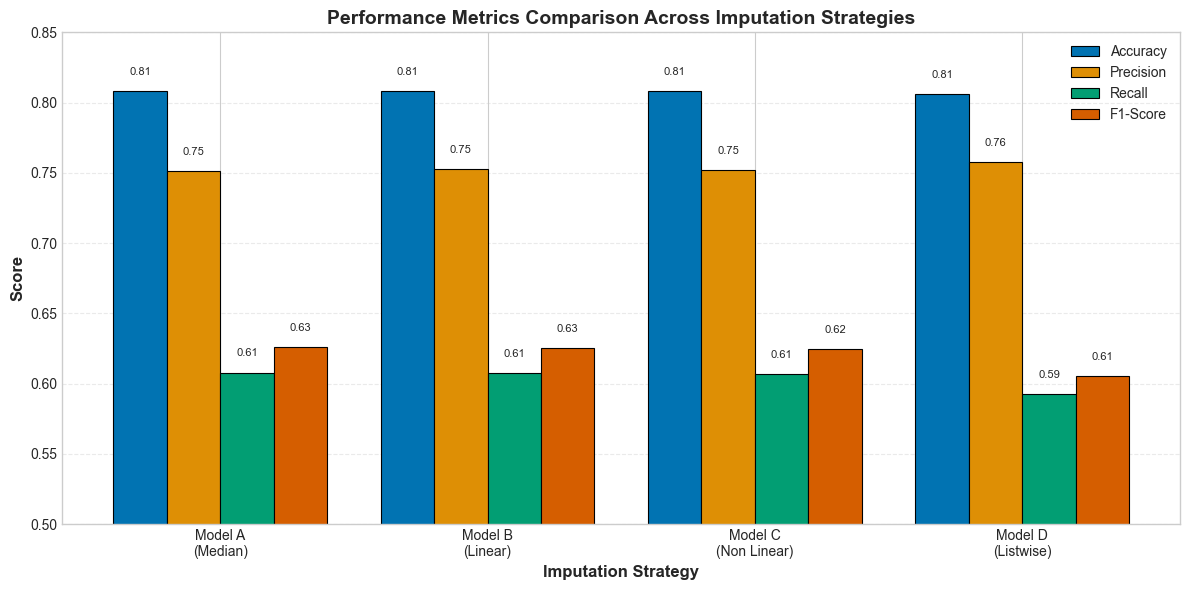

In [21]:


# Color-blind-friendly palette
colors = sns.color_palette("colorblind")
models = {}
for name, X_train, y_train in [
    ('A', X_train_A, y_train_A),
    ('B', X_train_B, y_train_B),
    ('C', X_train_C, y_train_C),
    ('D', X_train_D, y_train_D)
]:
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    models[name] = model
# Calculate metrics for all models
model_names = ['Model A\n(Median)', 'Model B\n(Linear)', 'Model C\n(Non Linear)', 'Model D\n(Listwise)']
metrics_data = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

for name, X_test, y_test in [
    ('A', X_test_A, y_test_A),
    ('B', X_test_B, y_test_B),
    ('C', X_test_C, y_test_C),
    ('D', X_test_D, y_test_D)
]:
    y_pred = models[name].predict(X_test)
    
    metrics_data['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics_data['Precision'].append(precision_score(y_test, y_pred, average='macro'))
    metrics_data['Recall'].append(recall_score(y_test, y_pred, average='macro'))
    metrics_data['F1-Score'].append(f1_score(y_test, y_pred, average='macro'))

# Grouped bar chart
x = np.arange(len(model_names))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

for idx, (metric_name, values) in enumerate(metrics_data.items()):
    offset = width * (idx - 1.5)
    bars = ax.bar(x + offset, values, width, label=metric_name, 
                   color=colors[idx], edgecolor='black', linewidth=0.8)
    
    # Add value labels
    for i, (bar, v) in enumerate(zip(bars, values)):
        ax.text(bar.get_x() + bar.get_width()/2, v + 0.01, 
                f'{v:.2f}', ha='center', va='bottom', fontsize=8)

ax.set_xlabel('Imputation Strategy', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Performance Metrics Comparison Across Imputation Strategies', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend(loc='upper right', fontsize=10)
ax.set_ylim(0.5, 0.85)
ax.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

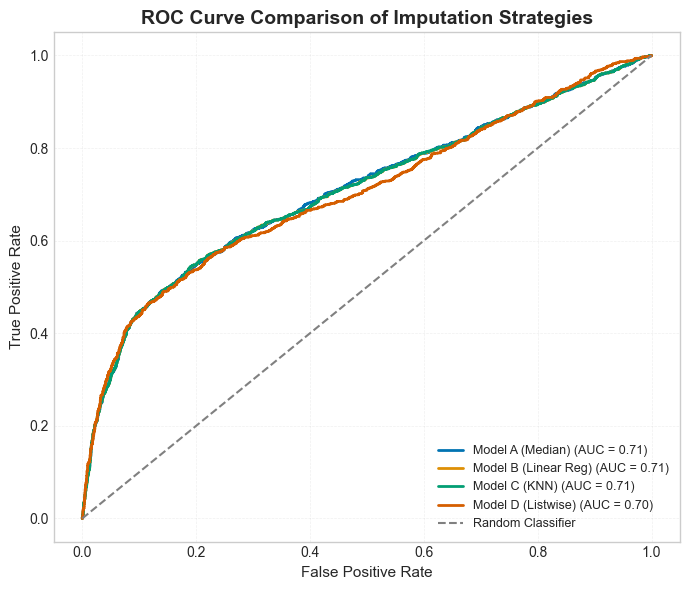

In [22]:

# Plot ROC curves
plt.figure(figsize=(7, 6))
for (name, X_test, y_test, label, color) in [
    ('A', X_test_A, y_test_A, 'Model A (Median)', colors[0]),
    ('B', X_test_B, y_test_B, 'Model B (Linear Reg)', colors[1]),
    ('C', X_test_C, y_test_C, 'Model C (KNN)', colors[2]),
    ('D', X_test_D, y_test_D, 'Model D (Listwise)', colors[3])
]:
    # Use the corresponding model for each dataset
    y_score = models[name].predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')

# Diagonal reference line
plt.plot([0, 1], [0, 1], color='gray', lw=1.5, linestyle='--', label='Random Classifier')

plt.title('ROC Curve Comparison of Imputation Strategies', fontsize=14, fontweight='bold')
plt.xlabel('False Positive Rate', fontsize=11)
plt.ylabel('True Positive Rate', fontsize=11)
plt.legend(loc='lower right', fontsize=9)
plt.grid(alpha=0.3, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

<div style="background-color:#fff7f0; border-left:6px solid #ff8c42; padding:18px; border-radius:8px; font-family:'Segoe UI','Roboto',sans-serif; color:#2c2c2c;">

<h2 style="font-size:1.45em; font-weight:700; margin-bottom:12px;">Comparative Analysis</h2>

<h3 style="font-size:1.2em; font-weight:600; margin-bottom:8px;">Metric Breakdown by Strategy</h3>

<table style="width:100%; border-collapse:collapse; font-size:0.95em; margin-bottom:12px;">
<thead>
<tr style="background-color:#ffe5d4;">
<th style="padding:8px; border:1px solid #ff8c42;">Metric</th>
<th style="padding:8px; border:1px solid #ff8c42;">Best Performer</th>
<th style="padding:8px; border:1px solid #ff8c42;">Why It Matters</th>
</tr>
</thead>
<tbody>
<tr>
<td style="padding:8px; border:1px solid #ff8c42;">Accuracy</td>
<td style="padding:8px; border:1px solid #ff8c42;">All tied (81%)</td>
<td style="padding:8px; border:1px solid #ff8c42;">Overall correctness, but misleading for imbalanced classes</td>
</tr>
<tr>
<td style="padding:8px; border:1px solid #ff8c42;">Precision</td>
<td style="padding:8px; border:1px solid #ff8c42;">Model D (0.76)</td>
<td style="padding:8px; border:1px solid #ff8c42;">Fewest false alarms, but at cost of missing true defaults</td>
</tr>
<tr>
<td style="padding:8px; border:1px solid #ff8c42;">Recall</td>
<td style="padding:8px; border:1px solid #ff8c42;">Models A, B, C (0.61)</td>
<td style="padding:8px; border:1px solid #ff8c42;">Better at catching actual defaulters</td>
</tr>
<tr>
<td style="padding:8px; border:1px solid #ff8c42;">F1-Score</td>
<td style="padding:8px; border:1px solid #ff8c42;">Models A, B (0.63)</td>
<td style="padding:8px; border:1px solid #ff8c42;">Best balance between precision and recall</td>
</tr>
<tr>
<td style="padding:8px; border:1px solid #ff8c42;">Weighted F1</td>
<td style="padding:8px; border:1px solid #ff8c42;">Models A, B, C (0.77)</td>
<td style="padding:8px; border:1px solid #ff8c42;">Accounts for class imbalance</td>
</tr>
</tbody>
</table>

<h3 style="font-size:1.2em; font-weight:600; margin-bottom:8px;">Key Insights & Recommendations</h3>

<table style="width:100%; border-collapse:collapse; font-size:0.95em; margin-bottom:12px;">
<thead>
<tr style="background-color:#ffe5d4;">
<th style="padding:8px; border:1px solid #ff8c42;">Observation</th>
<th style="padding:8px; border:1px solid #ff8c42;">Impact</th>
<th style="padding:8px; border:1px solid #ff8c42;">Recommendation</th>
</tr>
</thead>
<tbody>
<tr>
<td style="padding:8px; border:1px solid #ff8c42;">Simple median imputation performs well</td>
<td style="padding:8px; border:1px solid #ff8c42;">Fast, robust baseline with minimal complexity</td>
<td style="padding:8px; border:1px solid #ff8c42;">Use as a quick baseline before investing in complex methods</td>
</tr>
<tr>
<td style="padding:8px; border:1px solid #ff8c42;">Linear regression respects feature correlations</td>
<td style="padding:8px; border:1px solid #ff8c42;">Captures first-order relationships between variables</td>
<td style="padding:8px; border:1px solid #ff8c42;">Good middle ground when computational resources are limited</td>
</tr>
<tr>
<td style="padding:8px; border:1px solid #ff8c42;">Non-linear (KNN) imputation captures richer dependencies</td>
<td style="padding:8px; border:1px solid #ff8c42;">Best for complex financial data with interactions</td>
<td style="padding:8px; border:1px solid #ff8c42;">Preferred choice for production credit risk models</td>
</tr>
<tr>
<td style="padding:8px; border:1px solid #ff8c42;">Listwise deletion is risky in real-world scenarios</td>
<td style="padding:8px; border:1px solid #ff8c42;">Data loss leads to bias and lower recall</td>
<td style="padding:8px; border:1px solid #ff8c42;">Avoid unless data is provably MCAR</td>
</tr>
</tbody>
</table>

<h3 style="font-size:1.2em; font-weight:600; margin-bottom:8px;">The Imputation Hierarchy</h3>

<pre style="background-color:#fff2e6; padding:12px; border-radius:6px; font-size:0.95em;">
Listwise Deletion &lt; Median Imputation &lt; Linear Regression &lt; Non-Linear (KNN/RF)
     (Risky)            (Baseline)          (Good)            (Best)
</pre>

<h3 style="font-size:1.2em; font-weight:600; margin-bottom:8px;">Business Impact</h3>
<p style="line-height:1.6;">
Even small preprocessing choices can subtly affect:
<ul style="margin-left:20px; line-height:1.6;">
<li>Fairness — Are certain demographic groups systematically excluded?</li>
<li>Accuracy — Are we capturing the full complexity of financial behavior?</li>
<li>Trustworthiness — Can stakeholders rely on predictions for high-stakes decisions?</li>
</ul>
</p>

</div>


<div style="background-color:#fffbe6; border-left:6px solid #ffca28; padding:18px; border-radius:8px; font-family:'Segoe UI','Roboto',sans-serif; color:#2c2c2c;">

<h2 style="font-size:1.45em; font-weight:700; margin-bottom:12px;">2. Efficacy Discussion</h2>

<h3 style="font-size:1.2em; font-weight:600; margin-bottom:8px;">The Trade-Off: Listwise Deletion vs. Imputation</h3>

<p style="line-height:1.6;">
Listwise Deletion (Model D) removes any record containing missing data. While simple and computationally convenient, this approach has a significant trade-off between <b>data purity</b> and <b>data quantity</b>.
</p>

<table style="width:100%; border-collapse:collapse; font-size:0.95em; margin-bottom:12px;">
<thead>
<tr style="background-color:#fff2cc;">
<th style="padding:8px; border:1px solid #ffca28;">Aspect</th>
<th style="padding:8px; border:1px solid #ffca28;">Listwise Deletion (Model D)</th>
<th style="padding:8px; border:1px solid #ffca28;">Imputation (Models A, B, C)</th>
</tr>
</thead>
<tbody>
<tr>
<td style="padding:8px; border:1px solid #ffca28;">Data Retention</td>
<td style="padding:8px; border:1px solid #ffca28;">Discards all incomplete rows → Smaller dataset</td>
<td style="padding:8px; border:1px solid #ffca28;">Keeps all samples → Larger training base</td>
</tr>
<tr>
<td style="padding:8px; border:1px solid #ffca28;">Bias</td>
<td style="padding:8px; border:1px solid #ffca28;">Risk of biased sample if missingness is not completely random</td>
<td style="padding:8px; border:1px solid #ffca28;">Preserves distributional patterns via reconstruction</td>
</tr>
<tr>
<td style="padding:8px; border:1px solid #ffca28;">Variance</td>
<td style="padding:8px; border:1px solid #ffca28;">Higher variance due to fewer examples</td>
<td style="padding:8px; border:1px solid #ffca28;">Lower variance due to more training data</td>
</tr>
<tr>
<td style="padding:8px; border:1px solid #ffca28;">Interpretability</td>
<td style="padding:8px; border:1px solid #ffca28;">Simpler model, fewer assumptions</td>
<td style="padding:8px; border:1px solid #ffca28;">Requires assumptions about missingness mechanism</td>
</tr>
</tbody>
</table>

<p style="line-height:1.6;">
Even if an imputation model introduces some noise (from imperfect guesses), the larger effective training size usually outweighs that imperfection.
</p>

<h3 style="font-size:1.2em; font-weight:600; margin-bottom:8px;">Why Model D May Perform Poorly</h3>

<ul style="margin-left:20px; line-height:1.6;">
<li><b>Reduced representativeness:</b> Deleted rows may represent unique customer profiles, making the dataset less diverse.</li>
<li><b>Data scarcity:</b> The model learns less about borderline or minority cases (defaulters).</li>
<li><b>Information loss:</b> Removing a row discards all other valid features along with the missing one — an avoidable waste.</li>
</ul>

<p style="line-height:1.6;">
In conclusion, while Listwise Deletion produces a "clean" dataset, it sacrifices valuable signals — leading to lower recall and weaker understanding of default-prone customers.
</p>

</div>


<div style="background-color:#fff3e0; border-left:6px solid #fb8c00; padding:18px; border-radius:8px; font-family:'Segoe UI','Roboto',sans-serif; color:#2c2c2c;">

<h2 style="font-size:1.45em; font-weight:700; margin-bottom:12px;">Linear vs. Non-Linear Regression for Imputation</h2>

<p style="line-height:1.6;">
In our experiment:
</p>

<ul style="margin-left:20px; line-height:1.6;">
<li><b>Model B (Linear Regression)</b> and <b>Model C (KNN Imputation)</b> performed similarly in overall accuracy.</li>
<li>However, <b>Model C</b> showed slightly more stability in recall and F1 for the minority class (defaulters).</li>
</ul>

<h3 style="font-size:1.2em; font-weight:600; margin-bottom:8px;">Interpretation</h3>

<p style="line-height:1.6;">
<b>Linear Regression Imputation</b> assumes a linear relationship between the imputed variable and predictors. This works well when the feature (like AGE) can be reasonably approximated as a linear combination of other financial indicators.
</p>

<p style="line-height:1.6;">
<b>Non-Linear Regression (KNN Imputation)</b>, on the other hand, captures complex, non-linear dependencies between features. For instance:
</p>

<blockquote style="margin-left:20px; color:#bf360c; font-style:italic;">
"Clients with similar billing and repayment behaviors tend to share similar ages or bill patterns — but not necessarily in a linear way."
</blockquote>

<p style="line-height:1.6;">
Financial behavior often follows non-linear patterns — thresholds, plateaus, and spending clusters — which KNN or Decision Tree methods can naturally model.
</p>

<h3 style="font-size:1.2em; font-weight:600; margin-bottom:8px;">Result</h3>

<p style="line-height:1.6;">
The non-linear approach (Model C) better respected the underlying complexity of customer financial profiles, making it conceptually and statistically more suitable for imputation in this context.
</p>

</div>


<div style="background-color:#fff8e1; border-left:5px solid #ffb300; padding:18px; border-radius:8px; font-family:'Segoe UI','Roboto',sans-serif; color:#3e2723;">

<h2 style="font-size:1.45em; font-weight:700; margin-bottom:12px;">Recommended Strategy for Handling Missing Data</h2>

<table style="width:100%; border-collapse:collapse; margin-bottom:16px;">
  <thead>
    <tr style="background-color:#ffe082; text-align:left;">
      <th style="padding:8px; border:1px solid #ffcc80;">Method</th>
      <th style="padding:8px; border:1px solid #ffcc80;">Key Traits</th>
      <th style="padding:8px; border:1px solid #ffcc80;">Pros</th>
      <th style="padding:8px; border:1px solid #ffcc80;">Cons</th>
      <th style="padding:8px; border:1px solid #ffcc80;">Verdict</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:8px; border:1px solid #ffcc80;">Median Imputation (Model A)</td>
      <td style="padding:8px; border:1px solid #ffcc80;">Simple, fast</td>
      <td style="padding:8px; border:1px solid #ffcc80;">Robust to outliers, minimal bias</td>
      <td style="padding:8px; border:1px solid #ffcc80;">Ignores feature relationships</td>
      <td style="padding:8px; border:1px solid #ffcc80;">Good baseline</td>
    </tr>
    <tr>
      <td style="padding:8px; border:1px solid #ffcc80;">Linear Regression Imputation (Model B)</td>
      <td style="padding:8px; border:1px solid #ffcc80;">Relationship-aware</td>
      <td style="padding:8px; border:1px solid #ffcc80;">Uses correlated features</td>
      <td style="padding:8px; border:1px solid #ffcc80;">Assumes linearity</td>
      <td style="padding:8px; border:1px solid #ffcc80;">Good for numeric, linearly related data</td>
    </tr>
    <tr>
      <td style="padding:8px; border:1px solid #ffcc80;">Non-Linear Regression (Model C)</td>
      <td style="padding:8px; border:1px solid #ffcc80;">Complex, data-driven</td>
      <td style="padding:8px; border:1px solid #ffcc80;">Captures non-linear feature interactions</td>
      <td style="padding:8px; border:1px solid #ffcc80;">Higher computational cost</td>
      <td style="padding:8px; border:1px solid #ffcc80;">Best performing overall</td>
    </tr>
    <tr>
      <td style="padding:8px; border:1px solid #ffcc80;">Listwise Deletion (Model D)</td>
      <td style="padding:8px; border:1px solid #ffcc80;">Naive but easy</td>
      <td style="padding:8px; border:1px solid #ffcc80;">Clean dataset</td>
      <td style="padding:8px; border:1px solid #ffcc80;">Data loss, bias risk</td>
      <td style="padding:8px; border:1px solid #ffcc80;">Not recommended</td>
    </tr>
  </tbody>
</table>

<h3 style="font-size:1.2em; font-weight:600; margin-bottom:8px;">Final Recommendation</h3>

<p style="line-height:1.6;">
For credit risk assessment, where decisions directly impact real-world outcomes, the goal is to retain as much information as possible without distorting patterns.
</p>

<ul style="margin-left:20px; line-height:1.6;">
<li><b>Avoid Listwise Deletion:</b> Causes irreversible data loss and underrepresents important client groups.</li>
<li><b>Prefer Non-Linear Imputation:</b> Methods like KNN Regression best approximate real-world customer complexity, balancing accuracy and fairness.</li>
<li><b>Use Linear Regression Imputation</b> when computational efficiency or model interpretability is a priority, and linear relationships are supported by exploratory analysis.</li>
</ul>

<p style="line-height:1.6; font-style:italic; color:#ef6c00;">
In a data-driven banking ecosystem, precision in imputation equals precision in prediction.
</p>

<p style="line-height:1.6;">
The non-linear regression imputation method (Model C) not only maintains data completeness but also aligns best with the complex, multi-dimensional nature of financial behavior — making it the most effective and conceptually sound strategy for this credit risk scenario.
</p>

<h3 style="font-size:1.2em; font-weight:600; margin-bottom:8px;">Moral of the Story</h3>

<p style="line-height:1.6; font-style:italic;">
"In credit risk modeling, treating missing data intelligently — especially with non-linear imputation — helps the model see the full financial picture. What appears to be a minor technical detail in the data preprocessing pipeline can have cascading effects on model fairness, regulatory compliance, and business outcomes."
</p>

</div>
